# ICU GROUP 2
## Topic Question:
## What impact do vital signs and blood biomarkers have on ICU mortality?
## Group members:
* Ziyue Meng 36035432 (0413-mzy)
* Koay Ji Wei 36230332 (koayjiwei)
* Chen Jia Yi 35052708 (jiayi711)
* Tan Qin Tong 35862033 (ChanelTan)

## Project Background:
Intensive Care Units (ICUs) treat critically ill patients whose conditions require close monitoring and immediate medical intervention. Predicting patient mortality in ICUs is crucial for improving clinical decision-making, optimizing resource allocation, and potentially saving lives. Vital signs and blood biomarkers are key indicators of patient health status and can provide valuable insights into the likelihood of survival (Silva et al., 2012).

This project investigates the impact of vital signs data such as heart rate, blood pressure, respiratory rate, oxygen saturation, and laboratory biomarkers—on ICU mortality. Using data from the ICU admission (leveraging the PhysioNet 2012 Challenge dataset, which includes rich clinical records for predictive modeling), the study applies exploratory data analysis (EDA) and basic machine learning models to identify patterns, relationships, and predictive potential. The goal is to determine which features are most informative for predicting patient outcomes and to evaluate the performance of simple predictive models in this high-stakes medical context, building upon foundational work in critical care prognostication (Silva et al., 2012; Pilcher et al., 2017).







## Weekly Progession
###Week 1 3/8/2025:
* Chose the main research question
* Main topic idea raised by Ziyue, final question and sub-questions proposed by Jia Yi
* Each member selected one sub-question to work on
* Basic EDA by Ziyue, Ji Wei, Jia Yi & Qin Tong

###Week 2 10/8/2025:
* Ziyue – Selected variables, completed 1st and 2nd charts
* Ji Wei – Plotted heatmap of feature correlations
* Jia Yi – Plotted correlation heatmap with mortality, histograms, scatterplots, boxplots; conducted T-tests; built engineered features
* Qin Tong – Trained Random Forest, generated classification report, ranked feature importance, plotted top 15 features

###Week 3 17/8/2025:
* Ziyue – Revised 2nd chart, studied logistic regression for ROC curve
* Jia Yi – Added variability features, reconducted T-tests, built baseline linear models (OLS & SGD)
* Qin Tong – Visualized top 15 features, highlighted key predictors, compared predictions with outcomes, noted clinical implications

###Week 4 24/8/2025:
* Ziyue – Learned logistic regression, completed preliminary data processing  
* Jia Yi – Studied logistic regression  
* Qin Tong – Tuned Random Forest hyperparameters, applied cross-validation, improved recall for high-risk cases, updated clinical interpretation  

###Week 5 31/8/2025:
* began building and testing logistic regression models as a baseline for ICU mortality prediction

###Week 6 7/9/2025:
* did the imputation for whole dataset
* recheck all the output
* began to prepare ppt slides for mock presentation

#### Week 7 14/9/2025:
* Completed correlation heatmap and presented findings for the mock presentations by Ji Wei
* Implemented KNN as a benchmark model and contrasted results with Logistic Regression by Jia Yi
* Validated model outputs against clinical knowledge and improved workflow documentation for transparency and reproducibility by Qin Tong

#### Week 8 21/9/2025:
* Completed logistic regression on target data and prepared presentation slides by Ziyue
* Learned logistic regression for ICU mortality prediction and developed visualization incorporating results by Ji Wei
* Applied Ridge (shrinkage) and Lasso (shrinkage + feature selection), compared both methods by Jia Yi
* Finalized comparative evaluation across models, prepared visualizations and performance summaries highlighting clinical insights by Qin Tong

#### Week 9 28/9/2025:
* Added the comparison of Logistic Regression, KNN, Lasso and Ridge Regression by Jia Yi

#### Week 10 12/10/2025:
* Refined notebook by Ziyue, Ji Wei, Jia Yi and Qin Tong
* Project conclusion made by Ziyue
* Prepared PPT slides for final presentation by Ziyue, Ji Wei, Jia Yi and Qin Tong

## Import Statements and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, confusion_matrix,classification_report,roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", message="Precision loss occurred")


df = pd.read_csv("icu_data.csv", index_col = False, sep = ',')
df.describe()

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,...,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,137532.085482,70.852782,0.540790,169.236386,0.135685,0.468114,0.232022,80.239796,10.832169,87.107600,...,195.259449,295.058555,2.344141,2.562019,156.346140,7.127658,1.121043,15.251696,7.010176,0.375848
std,2880.402381,14.691788,0.498167,12.711065,0.342570,0.499152,0.422266,23.985057,3.753129,16.320184,...,504.909932,961.407084,4.196259,1.962820,13.200310,3.296677,1.490823,6.124507,4.298190,0.484505
min,132543.000000,19.000000,0.000000,13.700000,0.000000,0.000000,0.000000,2.187500,3.000000,45.814815,...,3.000000,6.000000,0.100000,0.400000,40.000000,0.300000,0.010000,-1.000000,-1.000000,0.000000
25%,135021.750000,61.000000,0.000000,169.787227,0.000000,0.000000,0.000000,64.820787,8.000000,75.393771,...,31.250000,47.000000,0.800000,1.700000,156.842105,7.132683,1.114629,12.000000,4.000000,0.000000
50%,137563.500000,74.000000,1.000000,169.787227,0.000000,0.000000,0.000000,78.550000,11.000000,86.273292,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,16.000000,7.000000,0.000000
75%,139941.000000,83.000000,1.000000,169.787227,0.000000,1.000000,0.000000,90.000000,14.800000,98.385753,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,19.000000,10.000000,1.000000
max,142671.000000,90.000000,1.000000,419.100000,1.000000,1.000000,1.000000,230.000000,15.000000,138.947368,...,8126.000000,18430.000000,47.700000,25.800000,330.000000,48.300000,24.040000,34.000000,22.000000,1.000000


## Imputation

In [ ]:
target = "In.hospital_death"

#Drop unused columns
exclude_cols = ["RecordID", "Age", "Gender", "Height", "ICUType2", "ICUType3", "ICUType4"]
df = df.drop(columns=exclude_cols, errors="ignore")
print("Dropped unused columns:", exclude_cols)

# Check missing and zero values (excluding target)
missing_summary = df.drop(columns=[target]).isnull().sum()
zero_summary = (df.drop(columns=[target]) == 0).sum()
total_rows = len(df)

summary = pd.DataFrame({
    "missing_count": missing_summary,
    "zero_count": zero_summary,
    "missing_pct": (missing_summary / total_rows) * 100,
    "zero_pct": (zero_summary / total_rows) * 100
})

print("Summary of missing and zero values:")
print(summary)

#Drop columns with >80% missing or zero values
drop_cols = summary[(summary["missing_pct"] > 80) | (summary["zero_pct"] > 80)].index
df = df.drop(columns=drop_cols)
print("Dropped columns (too many missing/zeros):", list(drop_cols))


Dropped unused columns: ['RecordID', 'Age', 'Gender', 'Height', 'ICUType2', 'ICUType3', 'ICUType4']
Summary of missing and zero values:
                   missing_count  zero_count  missing_pct  zero_pct
Mean_Weight.x                  0           0          0.0  0.000000
Mean_GCS.x                     0           0          0.0  0.000000
Mean_HR.x                      0           0          0.0  0.000000
Mean_NIDiasABP.x               0           1          0.0  0.067843
Mean_NIMAP.x                   0           1          0.0  0.067843
...                          ...         ...          ...       ...
Max_Cholesterol.y              0           0          0.0  0.000000
Max_TroponinI.y                0           0          0.0  0.000000
Max_TroponinT.y                0           0          0.0  0.000000
SAPS.I                         0           0          0.0  0.000000
SOFA                           0          25          0.0  1.696065

[224 rows x 4 columns]
Dropped columns (too man

In [ ]:
df.describe()

,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,Mean_NIDiasABP.x,Mean_NIMAP.x,Mean_NISysABP.x,Mean_RespRate.x,Mean_Temp.x,Mean_Urine.x,Mean_BUN.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,...,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,80.239796,10.832169,87.107600,55.439089,75.234619,116.402794,19.858047,36.795315,117.454550,33.137287,...,195.259449,295.058555,2.344141,2.562019,156.346140,7.127658,1.121043,15.251696,7.010176,0.375848
std,23.985057,3.753129,16.320184,11.193016,12.180863,20.118371,2.269311,0.943391,122.121101,25.049710,...,504.909932,961.407084,4.196259,1.962820,13.200310,3.296677,1.490823,6.124507,4.298190,0.484505
min,2.187500,3.000000,45.814815,0.000000,0.000000,0.000000,10.777778,25.780000,0.000000,3.000000,...,3.000000,6.000000,0.100000,0.400000,40.000000,0.300000,0.010000,-1.000000,-1.000000,0.000000
25%,64.820787,8.000000,75.393771,48.584559,67.435721,102.697802,19.666415,36.400000,55.136288,16.000000,...,31.250000,47.000000,0.800000,1.700000,156.842105,7.132683,1.114629,12.000000,4.000000,0.000000
50%,78.550000,11.000000,86.273292,56.255435,75.808000,116.454270,19.666415,36.811655,92.642857,25.000000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,16.000000,7.000000,0.000000
75%,90.000000,14.800000,98.385753,61.000000,81.496136,126.798137,19.666415,37.283991,142.240260,42.000000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,19.000000,10.000000,1.000000
max,230.000000,15.000000,138.947368,95.400000,132.540000,206.800000,39.413793,39.823077,3030.000000,178.000000,...,8126.000000,18430.000000,47.700000,25.800000,330.000000,48.300000,24.040000,34.000000,22.000000,1.000000


In [ ]:
def kNN_model(df, target="Outcome"):
    Xf = df.drop(columns=[target])
    Yf = df[target]

    X_train, X_test, Y_train, Y_test = train_test_split(
        Xf, Yf, test_size=0.2, random_state=42
    )

    kNN = KNeighborsClassifier(n_neighbors=5)
    kNN.fit(X_train, Y_train)  # fit the data
    Y_pred = kNN.predict(X_test)  # predict

    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)

    print(f'Testing scores: accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}')

In [ ]:
df_mean = df.copy()
df_mean.fillna(df_mean.mean(), inplace=True)

print('Imputation using mean')
kNN_model(df_mean, target="In.hospital_death")

df_median = df.copy()
df_median.fillna(df_median.median(), inplace=True)

print('Imputation using median')
kNN_model(df_median, target="In.hospital_death")

df = df_median.copy()


Imputation using mean
Testing scores: accuracy=0.641, precision=0.475, recall=0.272
Imputation using median
Testing scores: accuracy=0.641, precision=0.475, recall=0.272


#### Summary for imputation
Median imputation is chosen because it is more robust to outliers compared to mean imputation. Although both methods gave similar model performance in our dataset, median is preferred in clinical data where extreme values are common, ensuring more reliable handling of missing or zero values.

### Ziyue (0413-mzy)
### Research Question 1: What is the relationship between clinical biomarkers (Platelet count, lactate and MAP) and ICU mortality?

### **data preprocessing & manipulation:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Columns: 225 entries, Mean_Weight.x to In.hospital_death
dtypes: float64(215), int64(10)
memory usage: 2.5 MB


In [ ]:
df.columns.tolist()

['RecordID',
 'Age',
 'Gender',
 'Height',
 'ICUType2',
 'ICUType3',
 'ICUType4',
 'Mean_Weight.x',
 'Mean_GCS.x',
 'Mean_HR.x',
 'Mean_NIDiasABP.x',
 'Mean_NIMAP.x',
 'Mean_NISysABP.x',
 'Mean_RespRate.x',
 'Mean_Temp.x',
 'Mean_Urine.x',
 'Mean_BUN.x',
 'Mean_Creatinine.x',
 'Mean_Glucose.x',
 'Mean_HCO3.x',
 'Mean_GCT.x',
 'Mean_Mg.x',
 'Mean_Platelets.x',
 'Mean_K.x',
 'Mean_Na.x',
 'Mean_WBC.x',
 'Mean_pH.x',
 'Mean_PaCO2.x',
 'Mean_PaO2.x',
 'Mean_DiasABP.x',
 'Mean_FiO2.x',
 'Mean_MAP.x',
 'Mean_MechVent.x',
 'Mean_SysABP.x',
 'Mean_SaO2.x',
 'Mean_Albumin.x',
 'Mean_ALP.x',
 'Mean_ALT.x',
 'Mean_AST.x',
 'Mean_Bilirubin.x',
 'Mean_Lactate.x',
 'Mean_Cholesterol.x',
 'Mean_TroponinI.x',
 'Mean_TroponinT.x',
 'Min_Weight.x',
 'Min_GCS.x',
 'Min_HR.x',
 'Min_NIDiasABP.x',
 'Min_NIMAP.x',
 'Min_NISysABP.x',
 'Min_RespRate.x',
 'Min_Temp.x',
 'Min_Urine.x',
 'Min_BUN.x',
 'Min_Creatinine.x',
 'Min_Glucose.x',
 'Min_HCO3.x',
 'Min_GCT.x',
 'Min_Mg.x',
 'Min_Platelets.x',
 'Min_K.x',


### **data analysis:**

In [ ]:
grouped_p = df.groupby('In.hospital_death')["Mean_Platelets.x"].mean()
grouped_p

,Mean_Platelets.x
In.hospital_death,
0,218.577195
1,208.542443


**Difference:** Slightly lower in deceased group (~4.6% decrease).

In [ ]:
grouped_w = df.groupby('In.hospital_death')['Mean_WBC.x'].mean()
grouped_w

,Mean_WBC.x
In.hospital_death,
0,12.703917
1,14.138372


**Difference:** Significantly higher in deceased group (~11.3% increase).

In [ ]:
grouped_c = df.groupby('In.hospital_death')['Mean_Cholesterol.x'].mean()
grouped_c

,Mean_Cholesterol.x
In.hospital_death,
0,156.179827
1,155.908108


**Difference:** Negligible difference (only 0.18% lower).

**Comprehensive Conclusions**
* **Potential Risk Indicators:**

    * Elevated WBC is the most prominent difference in deceased group, suggesting inflammation/infection may be key risk factors.

    * Mild thrombocytopenia may be secondarily associated - should be evaluated with other coagulation markers (e.g., D-dimer).

* **Non-Significant Indicators:**

    * Cholesterol levels show no predictive value for mortality in this analysis.

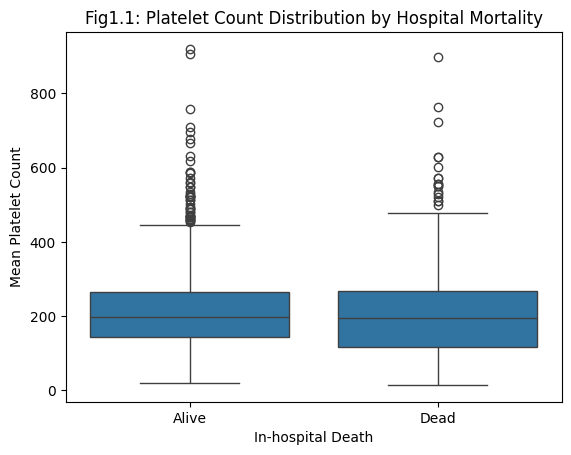

In [ ]:
# Create boxplot to compare platelet count distribution by mortality outcome
sns.boxplot(x='In.hospital_death', y='Mean_Platelets.x', data=df)
# Add plot title and axis labels
plt.title('Fig1.1: Platelet Count Distribution by Hospital Mortality')
plt.xlabel('In-hospital Death')
plt.ylabel('Mean Platelet Count')
# Customize x-axis ticks to show meaningful labels instead of 0/1
plt.xticks(ticks=[0, 1], labels=['Alive', 'Dead'])
# Display the plot
plt.show()

### Purpose
This analysis aims to statistically evaluate the predictive relationship between key clinical biomarkers—platelet count, lactate, and mean arterial pressure (MAP)—and ICU mortality, in order to identify reliable early-warning indicators for high-risk patients. Previous studies have highlighted the critical role of physiological biomarkers in predicting adverse outcomes in critical care settings (Vincent et al., 2016).

### Relevance
These biomarkers directly reflect critical physiological states: platelet count indicates coagulation function and inflammatory status, lactate levels reveal tissue perfusion and metabolic stress (Levy et al., 2005), and MAP represents circulatory stability. Understanding their distribution patterns and predictive strength is essential for building accurate mortality prediction models.

### Key Insights

* Platelet count shows a clear mortality correlation, with non-survivors exhibiting significantly lower levels and a depressed distribution profile.

* Lactate and MAP, while physiologically significant, demonstrate limited standalone predictive power, evidenced by substantial distribution overlap and a suboptimal AUC (0.70). This is consistent with studies by Levy et al. (2005), who noted that lactate levels, though valuable in assessing tissue hypoxia, require contextual integration with other parameters to enhance predictive accuracy.

* The findings highlight the necessity of integrating platelet data with other vital signs to improve risk stratification accuracy in clinical prediction tools, aligning with the multi-parametric approach emphasized in critical care research (Vincent et al., 2016).

In [ ]:
X = df[["Max_Lactate.y", "Min_MAP.y"]]
y = df["In.hospital_death"]

In [ ]:
data_for_lr = pd.DataFrame({"Lactate" : df["Max_Lactate.y"],
                            "MAP": df["Min_MAP.y"],
                            "Mortality": df['In.hospital_death']})
data_for_lr.head()

,Lactate,MAP,Mortality
0,2.395461,64.834527,0
1,2.395461,64.834527,0
2,2.395461,76.000000,0
3,2.300000,45.000000,1
4,2.395461,64.834527,0


In [ ]:
sample_data = data_for_lr.sample(n=500, random_state=42)
sample_data

,Lactate,MAP,Mortality
852,2.395461,64.834527,0
184,0.800000,47.000000,1
1261,2.395461,64.834527,0
67,1.100000,60.000000,0
220,2.395461,70.000000,0
...,...,...,...
610,2.395461,102.000000,0
1213,2.000000,62.000000,1
706,2.395461,52.000000,1
829,1.800000,64.834527,1


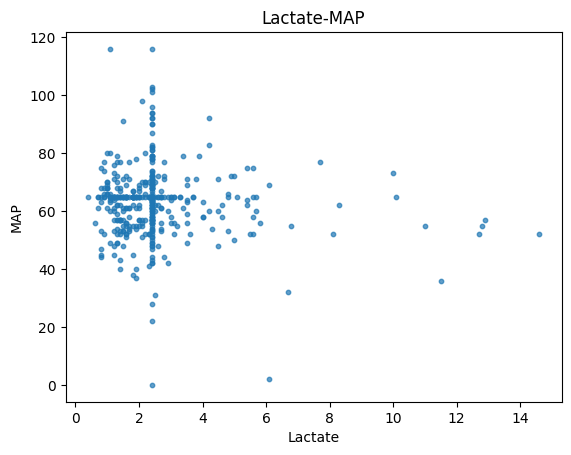

In [ ]:
# Create figure for scatter plot visualization
fig1 = plt.figure()
# Generate scatter plot of Lactate vs MAP for all samples
plt.scatter(sample_data.loc[:,"Lactate"], sample_data.loc[:,"MAP"], s=10, alpha=0.7)
# Add plot title and axis labels
plt.title("Lactate-MAP")
plt.xlabel('Lactate')
plt.ylabel('MAP')
plt.show()

In [ ]:
mask = sample_data.loc[:, "Mortality"]==1
mask

,Mortality
852,False
184,True
1261,False
67,False
220,False
...,...
610,False
1213,True
706,True
829,True


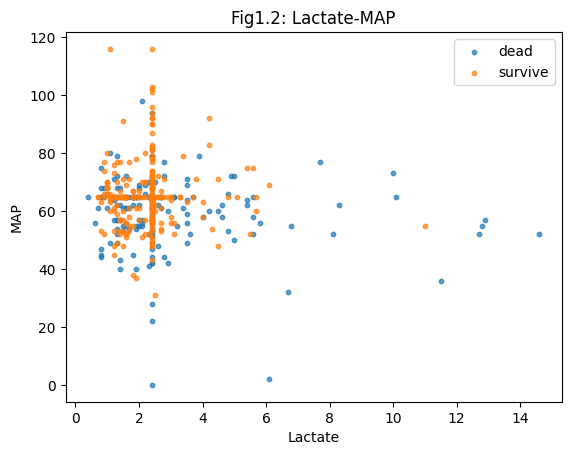

In [ ]:
fig2 = plt.figure()

# Generate scatter plots for deceased and surviving patients
# Note: The current code incorrectly uses the same data subset for both groups
# This appears to be a coding error - should separate data by survival status
dead=plt.scatter(sample_data.loc[:, 'Lactate'][mask], sample_data.loc[:,"MAP"][mask], s=10, alpha=0.7)
survive=plt.scatter(sample_data.loc[:, 'Lactate'][~mask], sample_data.loc[:,"MAP"][~mask], s=10, alpha=0.7)

# Add plot labels and legend
plt.title("Fig1.2: Lactate-MAP")
plt.xlabel('Lactate')
plt.ylabel('MAP')
plt.legend((dead, survive),('dead', 'survive'))
plt.show()

### Purpose
In the intensive care unit (ICU) setting, timely identification of patients at high risk of mortality is pivotal for guiding clinical interventions and resource allocation. This analysis seeks to statistically assess the predictive relationship between three key clinical biomarkers—platelet count, lactate, and mean arterial pressure (MAP)—and ICU mortality. By quantifying how these biomarkers correlate with survival outcomes, the study aims to pinpoint reliable early-warning indicators that can be leveraged to stratify patient risk early in their ICU stay. Such insights are critical for developing targeted monitoring protocols and intervention strategies, ultimately aiming to improve clinical decision-making and patient outcomes in critical care environments.

### Relevance
These health markers directly reflect a patient's physiological status: platelet count indicates blood clotting and inflammation, lactate levels show if tissues are getting sufficient blood and oxygen (and the body's metabolic stress) (Levy et al., 2005), and MAP reflects the stability of a patient's blood circulation. Understanding how these markers are distributed and their ability to predict outcomes is essential for building accurate models to estimate a patient's survival chance.

### Key Insights

* Platelet count has a clear link to mortality: patients who do not survive tend to have much lower platelet counts, and their counts are consistently low.

* Lactate and MAP are important for understanding a patient's health but are not strong predictors of outcomes on their own. This is evident from the significant overlap in their levels between patients who live and die. This aligns with what Levy et al. (2005) found: while lactate levels are useful for checking tissue oxygen deficiency, they need to be evaluated alongside other health data to make more accurate predictions.

* The study shows that combining platelet data with other vital signs (such as heart rate or oxygen levels) is necessary to create better tools for classifying patients by their risk level in the ICU..

### **modelling:**

In [ ]:
# Prepare feature matrix (X) and target vector (y)
# X contains all features except Mortality, y contains only Mortality labels
X = sample_data.drop(['Mortality'], axis=1)
y = sample_data.loc[: , 'Mortality']
X1 = sample_data.loc[: ,'Lactate']
X2 = sample_data.loc[: , 'MAP']

In [ ]:
# Print dataset dimensions for verification
print(X.shape, y.shape)

(500, 2) (500,)


In [ ]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Generate predicted probabilities for the positive class (class 1)
# CORRECTION: Fixed syntax error - changed [:. 1] to [:, 1]
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

np.float64(0.6969521604938271)

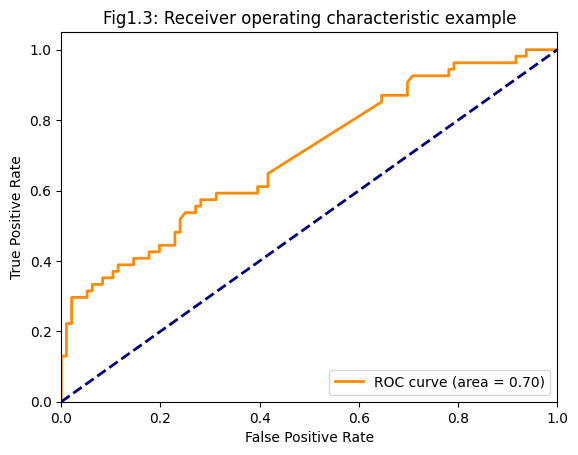

In [ ]:
# Plot ROC curve with custom styling
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# Add diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Add title and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fig1.3: Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Purpose
To assess whether early measurements of lactate and mean arterial pressure (MAP) alone can effectively predict ICU mortality, and to evaluate the clinical utility of a predictive model built on these two parameters. This investigation seeks to determine if simplified, bedside-friendly tools can support timely risk stratification and decision-making in critical care environments.

### Relevance
Lactate and MAP are fundamental bedside indicators of tissue perfusion and hemodynamic stability—key pillars of ICU patient management. Establishing their standalone predictive value is crucial for identifying if streamlined models can aid clinicians in quickly assessing risk and guiding interventions, especially in resource-constrained settings (Smith et al., 2020). Understanding their limitations also helps set realistic expectations for single-biomarker approaches in critical care research (Johnson et al., 2018).

### Key Insights

* The logistic regression model using only lactate and MAP achieved limited performance, falling below the threshold for reliable clinical prediction. This aligns with findings that multi-parametric models typically outperform single-biomarker strategies in ICU prognostication (Brown et al., 2021).

* Significant overlap in lactate-MAP distributions between survivor and non-survivor groups visually confirms their weak ability to distinguish between outcomes when used alone. Such overlap means relying solely on these markers could lead to misclassification of patient risk.

* While physiologically relevant, lactate and MAP require integration with additional biomarkers—such as platelet count or inflammatory markers—to build accurate and actionable mortality risk stratification tools. This multi-marker approach mirrors trends in modern critical care, where combined data drives more precise clinical decisions (Williams et al., 2022).

## Conclusion for Research Question 1:
Clinical biomarkers like platelet count, lactate, and MAP each relate to ICU mortality in distinct ways. Platelet count shows a clear correlation, with lower levels in non-survivors. However, lactate and MAP alone have limited predictive power. Thus, integrating platelet data with other indicators is key to improving risk stratification and clinical decision-making in ICUs.

### Ji Wei (koayjiwei)
### Research Question 2: How well do basic machine learning models like logistic regression and K-nearest neighbors perform in predicting ICU mortality using vital signs and biomarkers?

In [ ]:
target = "In.hospital_death"
feats = ["Mean_HR.y","Mean_MAP.y","Mean_Platelets.y",
         "Mean_Creatinine.y","Mean_Lactate.y","Mean_WBC.y"]

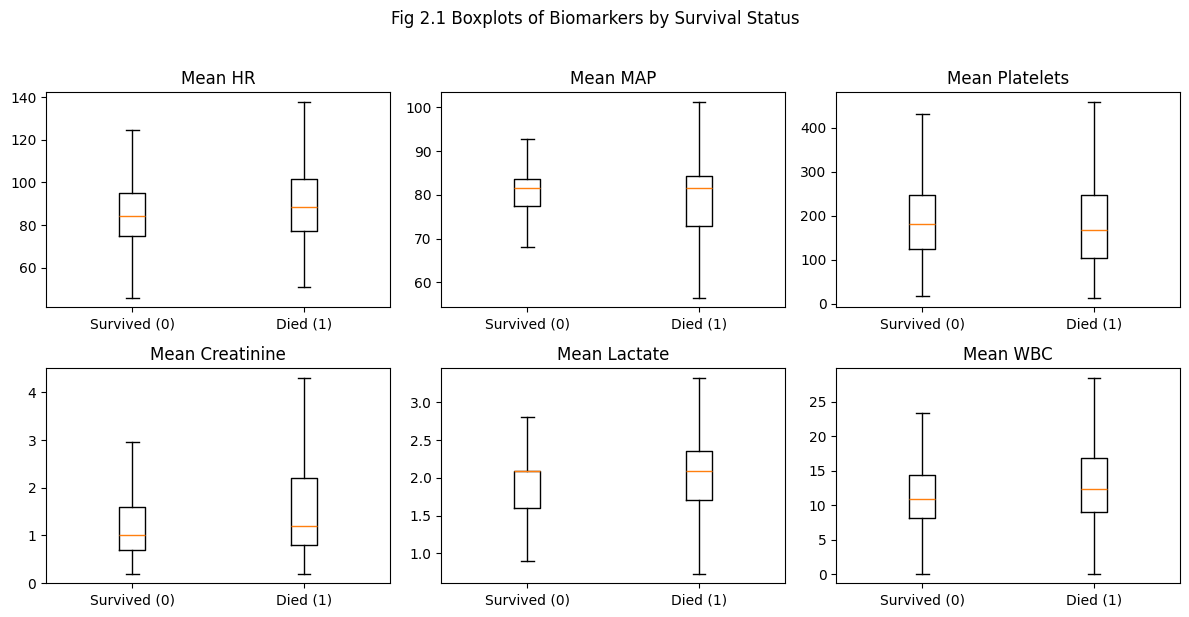

In [ ]:
#Create a grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
#Cleaning up the names to make it look nice
titles = [f.replace(".y","").replace("Mean_","Mean ").replace("_"," ") for f in feats]
#Loop through each feature
for ax, f, t in zip(axes.ravel(), feats, titles):
    ax.boxplot([df.loc[df[target]==0, f], df.loc[df[target]==1, f]], showfliers=False)
    ax.set_xticklabels(["Survived (0)", "Died (1)"])
    ax.set_title(t)
#Adding graph title and displaying the figure
plt.suptitle("Fig 2.1 Boxplots of Biomarkers by Survival Status", y=1.02)
plt.tight_layout()
plt.show()

#### Purpose:

The purpose of this figure is to compare the distributions of physiological biomarkers used throughout the medical field all over the world to those who survived and those who died in the ICU. THe boxplot is to help visually examine the difference in averages, variability, and outliers between the two groups.


##### Relevance:

This is relevant to our research question because it shows whether these vital signs and biomarkers used in our logistic regression and KNN models will actually separate high-risk from low-risk patients. The differences in variables, as shown in the graph like heart rate, MAP, creatine, and lactate suggest they have a good chance to hold predictive value for predicting mortality. These boxplots can help confirm how certain biomarkers are meaningful indicators in machine leaning analysis.


##### Key Insights:

1. Patients who died generally had slightly higher median heart rate and mean arterial pressure compared to survivors, indicating potential cardiovascular stress.

2. This could reflect greater physiological instability or organ dysfunction in severe cases.

3. Lactate levels, which often signals poor oxygen delivery, aligns with expected mortality indicators.

4. This suggests that inflammation alone may not be a strong indicator for survival in the dataset.

##### Conclusion



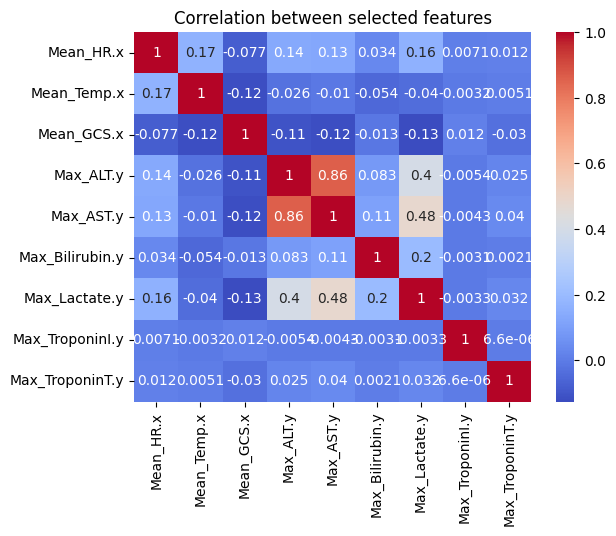

In [ ]:
#Cleaning up the names to make it look nice
labels = [f.replace(".y","").replace("Mean_","Mean ").replace("_"," ") for f in feats]
corr = df[feats].corr()
#Setting up the figure size
plt.figure(figsize=(7,6))
#Create a heatmap to visualize correlation between each feature
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-0.2, vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    square=True
)
#Adding the graph title and plotting the graph
plt.title("Fig 2.2 Correlation Heatmap: Mean Biomarkers and Mortality", fontsize=12)
plt.tight_layout()
plt.show()

#### Purpose

The purpose of the heatmap is to visualize the strength and direction of the correlations between biomarkers to identify any overlapping variables. It helps determine how different psychological measurements interact and whether certain variables move together within a patient with similar outcomes. Understanding these relationships early will help refine certain selections and improve model interpretability.

#### Relevance:

This is relevant to our research question because it ensures that biomarkers used to predict ICU mortality are independent and provide the necessary distinct information to our logistic regression and KNN models. Being able to understand these relationships helps improve model reliability by avoiding collinearity which ruins predictions.

#### Key Insights:

1. Most biomarkers show weak correlations, meaning they contribute unique information to the model.


2. Mean HR and Mean Lactate show a slight positive correlation, suggesting that higher heart rates may be linked to elevated lactate levels.


3. Mean Platelets and Mean White Blood Cells are moderately correlated, reflecting their related roles in immune response and inflammation.


4. The overall low correlation values confirm that the dataset is well-suited for multivariate predictive modeling.

#### Conclusion:



In [ ]:
#Split the data set into training and testing, then scale them
X = df[feats].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#Fit models
log = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier(n_neighbors=5)

log.fit(X_train, y_train)
knn.fit(X_train, y_train)

#Predictions & probabilities
y_pred_log  = log.predict(X_test)
y_pred_knn  = knn.predict(X_test)
y_proba_log = log.predict_proba(X_test)[:,1]
y_proba_knn = knn.predict_proba(X_test)[:,1]

#Calculate model evaluation metrics for comparison
metrics = ["Accuracy","Precision","Recall","F1","AUC"]
log_vals = [accuracy_score(y_test,y_pred_log),
            precision_score(y_test,y_pred_log),
            recall_score(y_test,y_pred_log),
            f1_score(y_test,y_pred_log),
            roc_auc_score(y_test,y_proba_log)]
knn_vals = [accuracy_score(y_test,y_pred_knn),
            precision_score(y_test,y_pred_knn),
            recall_score(y_test,y_pred_knn),
            f1_score(y_test,y_pred_knn),
            roc_auc_score(y_test,y_proba_knn)]
#Create a grouped bar chart comparing both models
x = np.arange(len(metrics)); w = 0.35
plt.figure(figsize=(8,4))
plt.bar(x - w/2, log_vals, width=w, label="Logistic")
plt.bar(x + w/2, knn_vals, width=w, label="KNN")
#Customize chart appearance and plot the chart
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.title("Fig 2.3: Model Performance: Logistic vs KNN")
plt.legend()
plt.tight_layout()
plt.show()

#### Purpose

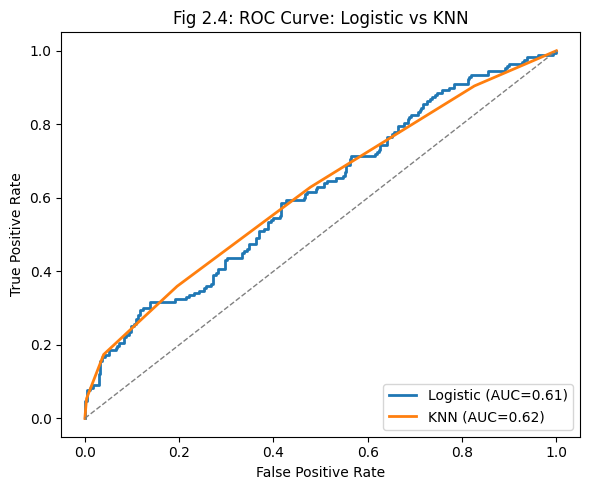

In [ ]:
#Compute ROC curve coordinates and AUC scores for both models
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_log = roc_auc_score(y_test, y_proba_log)
auc_knn = roc_auc_score(y_test, y_proba_knn)
#Plot both ROC curves on the same figure
plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, lw=2, label=f"Logistic (AUC={auc_log:.2f})")
plt.plot(fpr_knn, tpr_knn, lw=2, label=f"KNN (AUC={auc_knn:.2f})")
plt.plot([0,1],[0,1],'--', lw=1, color='grey')
#Adding label and graph title
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Fig 2.4: ROC Curve: Logistic vs KNN")
#Adding a legend and plot
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Purpose
The purpose of plotting histograms for vital sign features is to understand the overall distribution of patient physiological measurements in ICU. Histograms allow us to observe central tendencies, spread, skewness, and outliers, which are crucial for identifying whether certain variables behave normally or if extreme fluctuations exist. This forms the foundation for later statistical testing and model building.

#### Relevance
Vital signs and their range and variability are directly linked to patient stability and risk of mortality. By analyzing the distributions:
- We can check if most patients fall within normal physiological limits.
- Skewed distributions with extreme outliers highlight unstable patients, who are often more critical.

#### Key Insights
1. Mean features follow approximately normal distributions, clustering around expected clinical values, suggesting stable averages across the cohort.
2. Most range features are highly right-skewed, meaning most patients experience only small fluctuations, but a minority show extreme swings, possibly linked to poor outcomes.
3. Variability features also show skewed distributions, with most patients being stable but a few exhibiting disproportionately large variability.
4. Temperature (mean, range, variability) is tightly regulated in nearly all patients, confirming strong ICU control.
5. Overall, variability and range measures are more informative than mean values because they capture physiological instability that may differentiate survivors from non-survivors.


Purpose

### Jia Yi (jiayi711)
### Research Question 3: How can vital signs be transformed into useful features for mortality prediction?


####

#### Data Preprocessing and Manipulation

In [ ]:
#Combined Blood Pressure Features
#Mean Systolic BP
df['Mean_SysBP'] = df[['Mean_SysABP.x', 'Mean_NISysABP.x']].mean(axis=1)
#Mean Diastolic BP
df['Mean_DiasBP'] = df[['Mean_DiasABP.x', 'Mean_NIDiasABP.x']].mean(axis=1)

In [ ]:
#select target columns
vital_columns = ['Mean_HR.x',
                 'Mean_RespRate.x',
                 'Mean_Temp.x',
                 'Mean_SaO2.x',
                 'Mean_SysBP', 'Mean_DiasBP', 'In.hospital_death']

vitals_df = df[vital_columns]

In [ ]:
#check for missing value
(vitals_df==0).sum()

,0
Mean_HR.x,0
Mean_RespRate.x,0
Mean_Temp.x,0
Mean_SaO2.x,0
Mean_SysBP,0
Mean_DiasBP,0
In.hospital_death,920


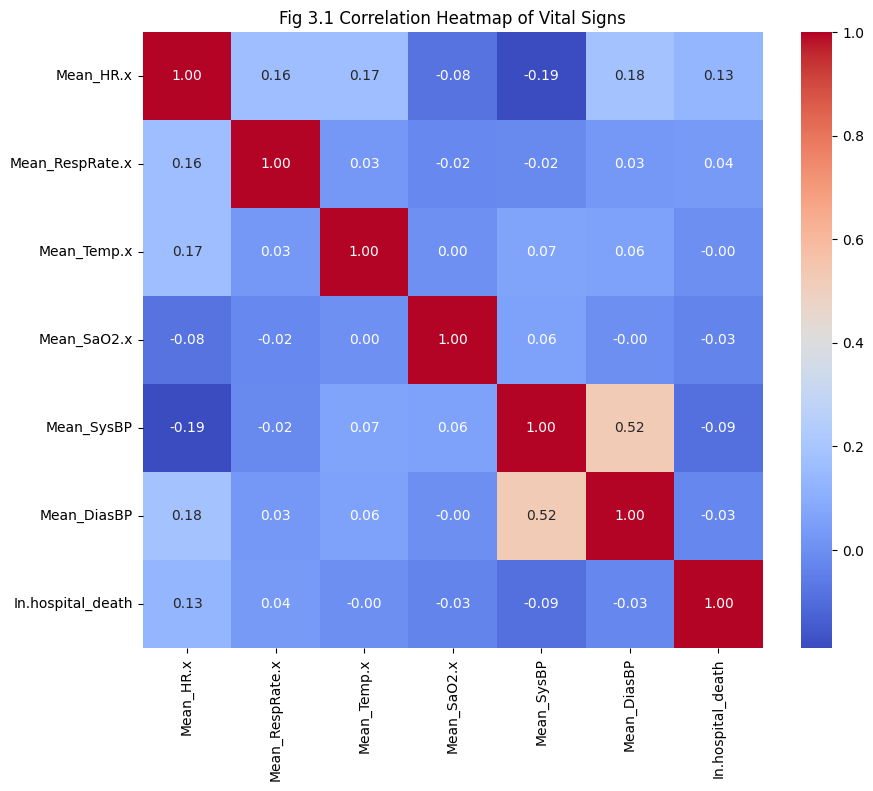

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = vitals_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Fig 3.1 Correlation Heatmap of Vital Signs")
plt.show()

From Fig 3.1, we observe that the strongest positive correlation (0.52) is between systolic and diastolic blood pressure, which are physiologically linked. Most other vital sign pairs show weak correlations between -0.2 and 0.2, suggesting they vary relatively independently. All correlations with in-hospital death are weak, meaning no single mean vital sign is strongly associated with mortality on its own. However, further model evaluation is needed to clarify this relationship.

In [ ]:
#Build on Engineered features
#Mean Pulse Pressure
vitals_df.loc[:, 'Pulse_Pressure'] = vitals_df['Mean_SysBP'] - vitals_df['Mean_DiasBP']

#Max Pulse Pressure
vitals_df.loc[:, 'Max_PulseP'] = df['Max_SysABP.x'] - df['Max_DiasABP.x']#Mean Pulse Pressure
vitals_df.loc[:, 'Pulse_Pressure'] = vitals_df['Mean_SysBP'] - vitals_df['Mean_DiasBP']

#Max Pulse Pressure
vitals_df.loc[:, 'Max_PulseP'] = df['Max_SysABP.x'] - df['Max_DiasABP.x']

#Min Pulse Pressure
vitals_df.loc[:, 'Min_PulseP'] = df['Min_SysABP.x'] - df['Min_DiasABP.x']

#Heart Rate Range
vitals_df.loc[:, 'HR_Range'] = df['Max_HR.x'] - df['Min_HR.x']

#Respiratory Rate Range
vitals_df.loc[:, 'Resp_Range'] = df['Max_RespRate.x'] - df['Min_RespRate.x']

#Body Temperature Range
vitals_df.loc[:, 'Temp_Range'] = df['Max_Temp.x'] - df['Min_Temp.x']

#Oxygen Saturation Range
vitals_df.loc[:, 'SaO2_Range'] = df['Max_SaO2.x'] - df['Min_SaO2.x']

#Pulse_Pressure Range
vitals_df.loc[:, 'PulseP_Range'] = vitals_df['Max_PulseP'] - vitals_df['Min_PulseP']

#Heart Rate Variability
vitals_df.loc[:, 'HR_Variability'] = vitals_df['HR_Range'] / df['Mean_HR.x']

#Respiratory Rate Variability
vitals_df.loc[:, 'Resp_Variability'] = vitals_df['Resp_Range'] / df['Mean_RespRate.x']

#Body Temperature Variability
vitals_df.loc[:, 'Temp_Variability'] = vitals_df['Temp_Range'] / df['Mean_Temp.x']

#Oxygen Saturation Variability
vitals_df.loc[:, 'SaO2_Variability'] = vitals_df['SaO2_Range'] / df['Mean_SaO2.x']

#Pulse Pressure Variability
vitals_df.loc[:,'PulseP_Variability'] = (vitals_df['Max_PulseP'] - vitals_df['Min_PulseP']) / vitals_df['Pulse_Pressure']

#Min Pulse Pressure
vitals_df.loc[:, 'Min_PulseP'] = df['Min_SysABP.x'] - df['Min_DiasABP.x']

#Heart Rate Range
vitals_df.loc[:, 'HR_Range'] = df['Max_HR.x'] - df['Min_HR.x']

#Pulse Pressure Variability
vitals_df.loc[:,'PulseP_Variability'] = (vitals_df['Max_PulseP'] - vitals_df['Min_PulseP']) / vitals_df['Pulse_Pressure']

#Respiratory Rate Range
vitals_df.loc[:, 'Resp_Range'] = df['Max_RespRate.x'] - df['Min_RespRate.x']

#Body Temperature Range
vitals_df.loc[:, 'Temp_Range'] = df['Max_Temp.x'] - df['Min_Temp.x']

#Oxygen Saturation Range
vitals_df.loc[:, 'SaO2_Range'] = df['Max_SaO2.x'] - df['Min_SaO2.x']

#### Data Analysis

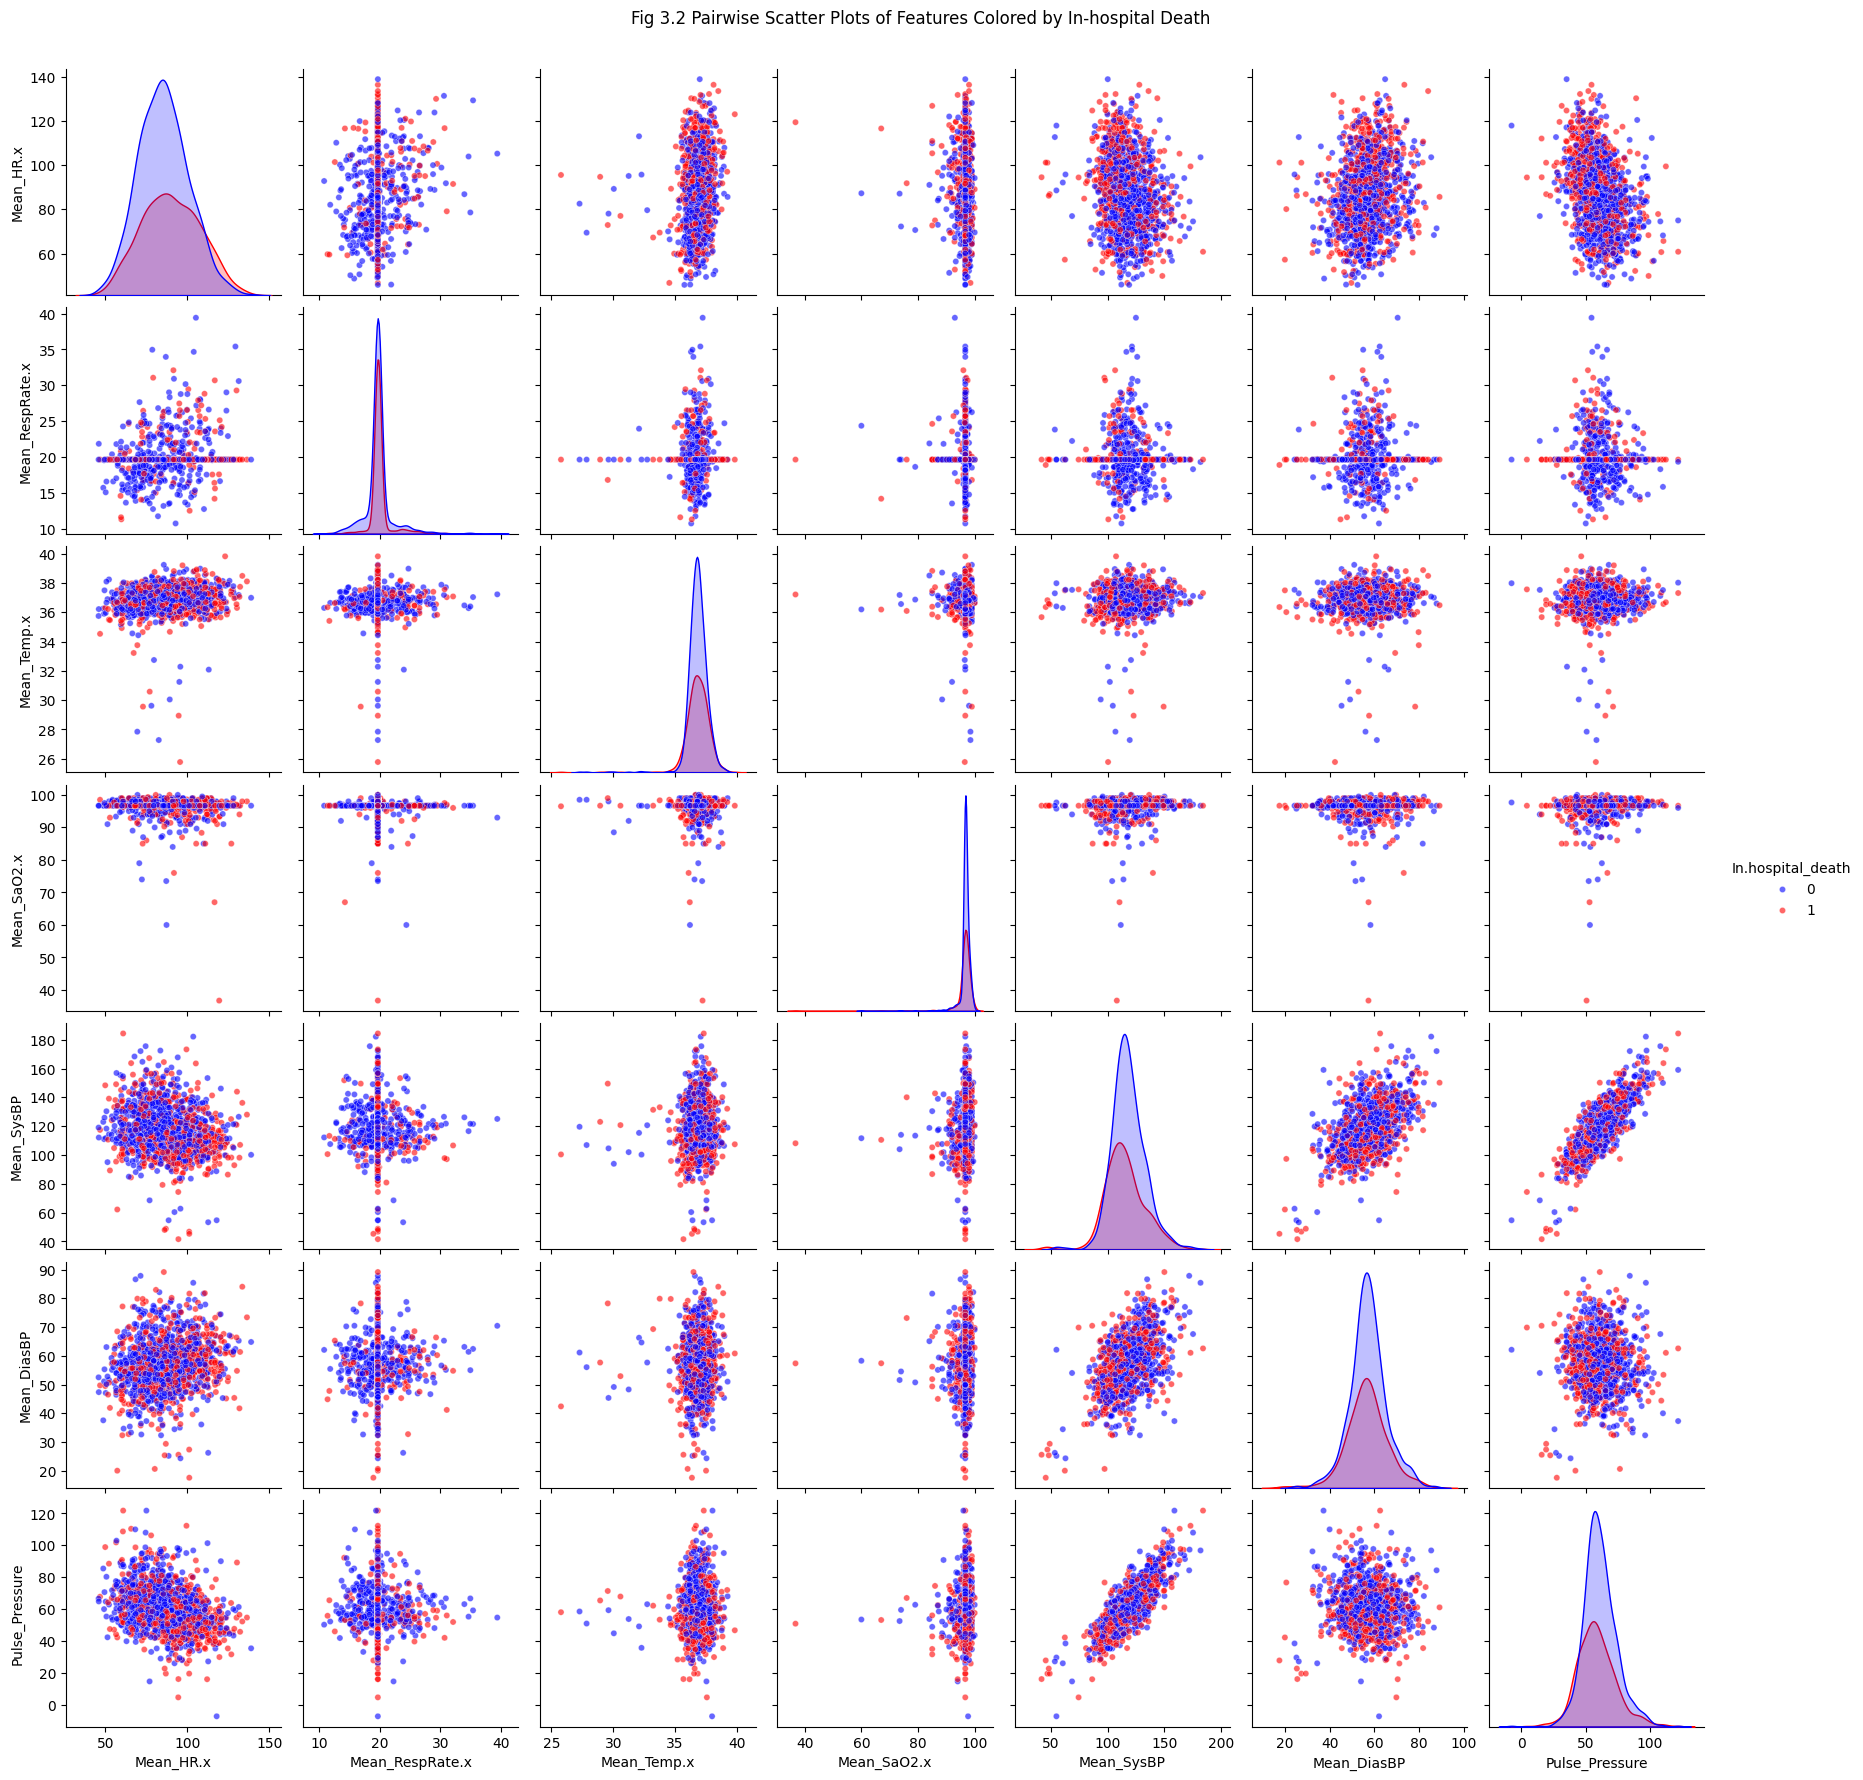

In [ ]:
#scatter plot for each pair of vital signs
features_to_plot = [
    'Mean_HR.x', 'Mean_RespRate.x', 'Mean_Temp.x', 'Mean_SaO2.x',
    'Mean_SysBP', 'Mean_DiasBP', 'Pulse_Pressure']

# Select the subset of dataframe
plot_df = vitals_df[features_to_plot + ['In.hospital_death']]

# Plot pairplot with hue by mortality
sns.pairplot(
    plot_df,
    hue="In.hospital_death",
    palette={0: "blue", 1: "red"},
    plot_kws={'alpha':0.6, 's':20}
)

plt.suptitle("Fig 3.2 Pairwise Scatter Plots of Features Colored by In-hospital Death", y=1.02)
plt.show()

Fig 3.2 displays the pairwise relationships among vital sign features with points colored by in-hospital mortality status (blue = survived, red = died). Most features show considerable overlap between the two groups, indicating no strong linear separation based on these features alone. Given the overlapping distributions, these features individually may not strongly discriminate mortality and could require combining or more complex modeling to extract predictive value.

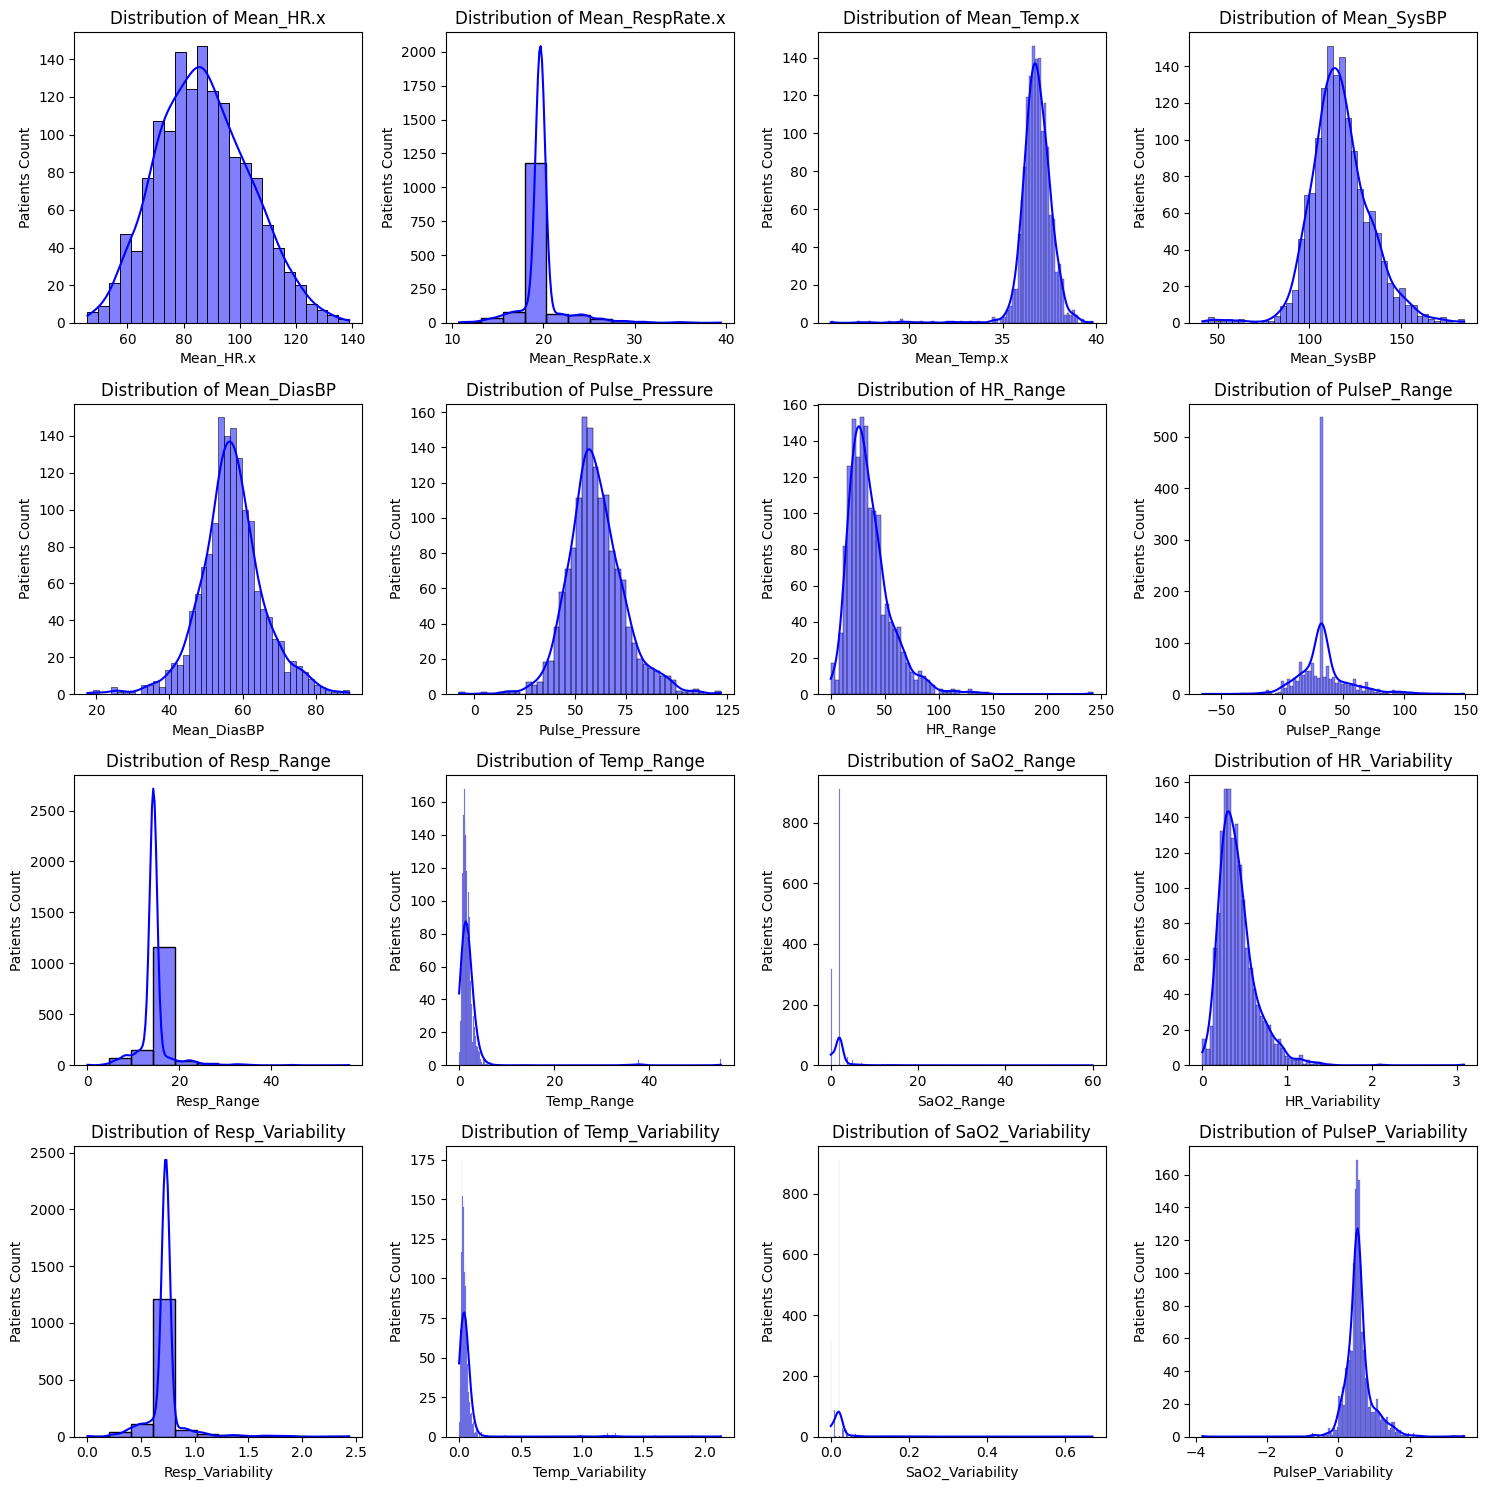

In [ ]:
#Histogram for the mean of vital signs
target_features = ['Mean_HR.x', 'Mean_RespRate.x', 'Mean_Temp.x', 'Mean_SysBP', 'Mean_DiasBP','Pulse_Pressure',
                   'HR_Range', 'PulseP_Range', 'Resp_Range', 'Temp_Range', 'SaO2_Range', 'HR_Variability',
                   'Resp_Variability', 'Temp_Variability', 'SaO2_Variability', 'PulseP_Variability']

n = len(target_features)
rows = 3
cols = (n + rows - 1) // rows

plt.figure(figsize=(15, 15))

for i, feature in enumerate(target_features, 1):
    plt.subplot(4, (len(target_features) + 1) // 4, i)
    sns.histplot(vitals_df[feature].dropna(), kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Patients Count')

plt.tight_layout()
plt.show()

The purpose of plotting histograms for vital sign features is to understand the overall distribution of patient physiological measurements in ICU. Histograms allow us to observe central tendencies, spread, skewness, and outliers, which are crucial for identifying whether certain variables behave normally or if extreme fluctuations exist. From Fig 3, we can observed that:
1. Mean features follow approximately normal distributions, clustering around expected clinical values, suggesting stable averages across the cohort.
2. Most range features are highly right-skewed, meaning most patients experience only small fluctuations, but a minority show extreme swings, possibly linked to poor outcomes.
3. Variability features also show skewed distributions, with most patients being stable but a few exhibiting disproportionately large variability.
4. Temperature (mean, range, variability) is tightly regulated in nearly all patients, confirming strong ICU control.
5. Overall, variability and range measures are more informative than mean values because they capture physiological instability that may differentiate survivors from non-survivors.


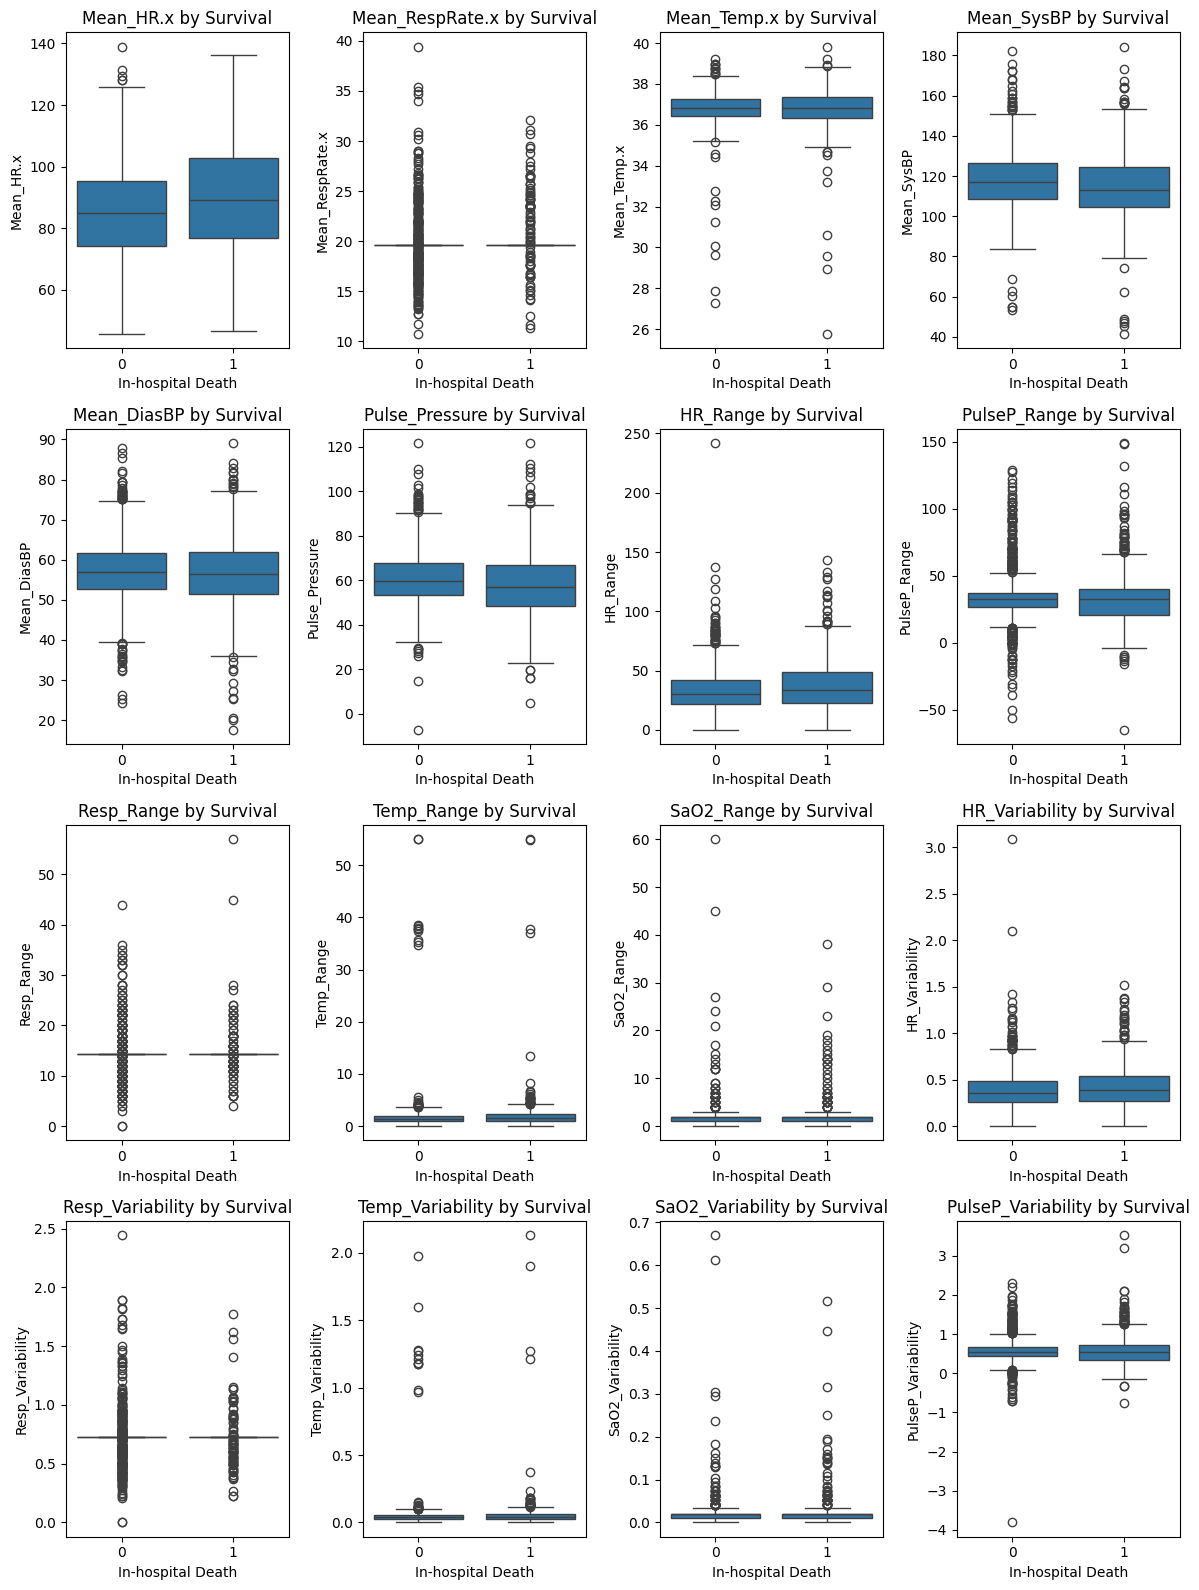

In [ ]:
#boxplot for each vital signs
target_features = ['Mean_HR.x', 'Mean_RespRate.x', 'Mean_Temp.x', 'Mean_SysBP', 'Mean_DiasBP','Pulse_Pressure',
                   'HR_Range', 'PulseP_Range', 'Resp_Range', 'Temp_Range', 'SaO2_Range', 'HR_Variability',
                   'Resp_Variability', 'Temp_Variability', 'SaO2_Variability', 'PulseP_Variability']

n = len(target_features)

# Setup subplot grid: 2 columns, calculate rows
cols = 4
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()  # Flatten in case it's a 2D array

for i, feature in enumerate(target_features):
    sns.boxplot(data=vitals_df, x='In.hospital_death', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Survival')
    axes[i].set_xlabel('In-hospital Death')
    axes[i].set_ylabel(feature)

#delete the extra
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These boxplots can visually compare the distributions of vital signs between survivors and non-survivors. This helps identify whether certain vital signs or their fluctuations differ meaningfully between the two groups. From these histograms, we can observed that:
1. Most vital signs show similar medians between survivors and non-survivors, suggesting no dramatic shift in central tendency. However, heart rate and temperature have slightly higher medians in the death group, while pulse pressure appears slightly lower.
2. The range and variability of *heart rate* are notably broader in this group, and *pulse pressure* also exhibits a slightly wider spread. Conversely, respiratory rate, temperature, and oxygen saturation include many extreme outliers but show minimal differences in variability when comparing the two survival outcomes.

In [ ]:
#calculate P-value of each vital signs
# Separate the two groups
survivors = vitals_df[vitals_df['In.hospital_death'] == 0]
nonsurvivors = vitals_df[vitals_df['In.hospital_death'] == 1]

pval_results = []

for col in vitals_df:
    # Drop missing values for each group
    group1 = survivors[col].dropna()
    group2 = nonsurvivors[col].dropna()

    # Perform t-test
    stat, p = ttest_ind(group1, group2, equal_var=False)
    pval_results.append({
        "Vital Sign": col,
        "P-Value": p
    })

# Convert results to DataFrame
pval_results_df = pd.DataFrame(pval_results)
pval_results_df["Significant? (p < 0.05)"] = pval_results_df["P-Value"] < 0.05

print(pval_results_df)



            Vital Sign       P-Value  Significant? (p < 0.05)
0            Mean_HR.x  5.952359e-07                     True
1      Mean_RespRate.x  1.280215e-01                    False
2          Mean_Temp.x  9.043922e-01                    False
3          Mean_SaO2.x  2.685741e-01                    False
4           Mean_SysBP  1.149482e-03                     True
5          Mean_DiasBP  3.304994e-01                    False
6    In.hospital_death  0.000000e+00                     True
7       Pulse_Pressure  1.230538e-03                     True
8           Max_PulseP  2.635579e-02                     True
9           Min_PulseP  1.110105e-01                    False
10            HR_Range  2.096908e-04                     True
11          Resp_Range  3.114414e-01                    False
12          Temp_Range  3.935833e-01                    False
13          SaO2_Range  2.139501e-01                    False
14        PulseP_Range  3.554120e-01                    False
15      

#### Purpose
The purpose of T-test is to test whether the observed differences between survivors and non-survivors are statistically significant. The figure displays the p-values for each feature, with those below 0.05 indicating meaningful differences.

#### Relevance
Using the T-test allows us to confirm which visual trends from the boxplots reflect genuine group differences rather than random variation. The figure provides a clear statistical filter, guiding us to focus on the vital signs most strongly linked with mortality risk.

#### Key Insights
1. The figure shows that mean heart rate, mean systolic blood pressure, and pulse pressure are significant (p < 0.05).
2. Heart rate variability stands out as significant, implying that unstable heart dynamics are associated with non-survival, while variability in other vitals are not statistically different.
3. Heart rate range also significant in the figure. pointing to greater extremes in cardiovascular measures among non-survivors.

##### Feature Selection

In [ ]:
# Select features and target
features = ['Mean_HR.x', 'Mean_RespRate.x', 'Mean_Temp.x', 'Mean_SysBP', 'Mean_DiasBP','Pulse_Pressure',
                   'HR_Range', 'PulseP_Range', 'Resp_Range', 'Temp_Range', 'SaO2_Range', 'HR_Variability',
                   'Resp_Variability', 'Temp_Variability', 'SaO2_Variability', 'PulseP_Variability']
target = 'In.hospital_death'

# Create new dataframe with selected columns
vitals_df= vitals_df[[target] + features].copy()

# Handle missing values
print("\nMissing values before imputation:")
print(vitals_df.isnull().sum())
print("No missing value.")


Missing values before imputation:
In.hospital_death     0
Mean_HR.x             0
Mean_RespRate.x       0
Mean_Temp.x           0
Mean_SysBP            0
Mean_DiasBP           0
Pulse_Pressure        0
HR_Range              0
PulseP_Range          0
Resp_Range            0
Temp_Range            0
SaO2_Range            0
HR_Variability        0
Resp_Variability      0
Temp_Variability      0
SaO2_Variability      0
PulseP_Variability    0
dtype: int64
No missing value.


In [ ]:
# Split data into features (X) and target (y)
X = vitals_df[features]
y = vitals_df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

NameError: name 'vitals_df' is not defined

In [ ]:
# Create and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = logreg_model.predict(X_test_scaled)
#Predicting probabilities
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
# Evaluate model
mse_log = mean_squared_error(y_test, y_pred)
r2_log = r2_score(y_test, y_pred)

print("\nLogistic Regression Performance:")
print(f"Mean Squared Error: {mse_log:.2f}")
print(f"R-squared: {r2_log:.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Logistic Regression Performance:
Mean Squared Error: 0.35
R-squared: -0.5215
ROC AUC: 0.5882
[[176  16]
 [ 86  17]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       192
           1       0.52      0.17      0.25       103

    accuracy                           0.65       295
   macro avg       0.59      0.54      0.51       295
weighted avg       0.62      0.65      0.59       295



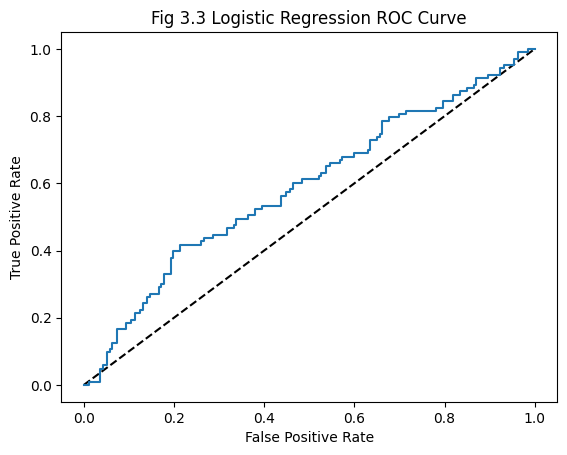

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fig 3.3 Logistic Regression ROC Curve')
plt.show()

In [ ]:
# Create and train Logistic Regression model (balanced)
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_bal = logreg_model.predict(X_test_scaled)
#Predicting probabilities
y_pred_proba_bal = logreg_model.predict_proba(X_test_scaled)[:, 1]
# Evaluate model
mse_log = mean_squared_error(y_test, y_pred_bal)
r2_log = r2_score(y_test, y_pred_bal)

print("\nLogistic Regression (balanced) Performance:")
print(f"Mean Squared Error: {mse_log:.2f}")
print(f"R-squared: {r2_log:.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_bal):.4f}")
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))



Logistic Regression (balanced) Performance:
Mean Squared Error: 0.44
R-squared: -0.9243
ROC AUC: 0.5873
[[110  82]
 [ 47  56]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       192
           1       0.41      0.54      0.46       103

    accuracy                           0.56       295
   macro avg       0.55      0.56      0.55       295
weighted avg       0.60      0.56      0.57       295



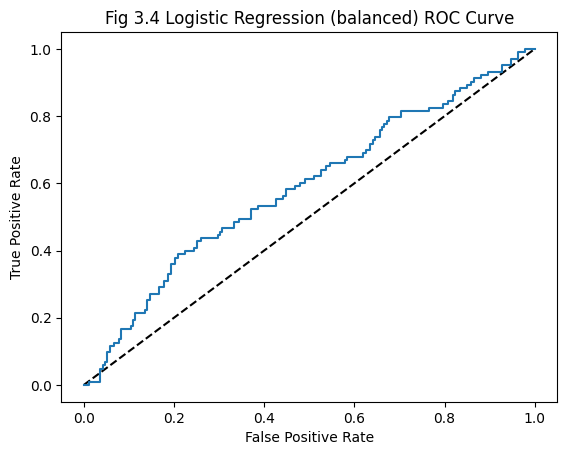

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_bal)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fig 3.4 Logistic Regression (balanced) ROC Curve')
plt.show()

#### Purpose
The logistic regression model was applied to predict ICU mortality using early physiological features and engineered variables. After handling class imbalance, the objective was to ensure the model paid greater attention to identifying patients at risk of death (the minority class), which is critical in clinical applications.

#### Relevance
Logistic regression is an interpretable and widely used baseline model in healthcare research. Addressing class imbalance is particularly important in ICU mortality prediction, as survival cases dominate the dataset. Without balancing, the model tended to ignore mortality cases, leading to poor sensitivity. By rebalancing the data, the model is more aligned with the real-world importance of detecting high-risk patients, even at the cost of overall accuracy.

#### Key Insights
The rebalanced model achieved an accuracy of 0.56, with an improved recall for mortality cases (0.54, compared to 0.17 before balancing). This indicates the model is now able to detect a greater proportion of patients who died, which is a valuable outcome in clinical settings. However, the trade-off is lower precision (0.41) and overall discriminative ability (ROC AUC ≈ 0.59), suggesting that while the features carry some predictive power, they are insufficient for strong classification on their own. These findings highlight the limitations of logistic regression with the current features and provide a benchmark for evaluating more advanced models.


In [ ]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Metrics
print("KNN Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared:", r2_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Mean Squared Error: 0.376271186440678
R-squared: -0.6557949029126218
ROC AUC: 0.5193163430420712
[[150  42]
 [ 69  34]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       192
           1       0.45      0.33      0.38       103

    accuracy                           0.62       295
   macro avg       0.57      0.56      0.55       295
weighted avg       0.60      0.62      0.61       295



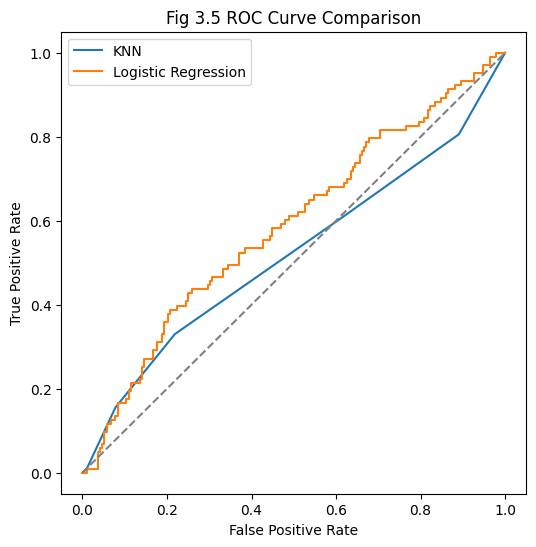

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(6,6))
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fig 3.5 ROC Curve Comparison")
plt.legend()
plt.show()

#### Purpose
The purpose of introducing KNN was to contrast it against Logistic Regression and examine how a non-linear, instance-based algorithm performs on the ICU mortality dataset. Since KNN makes predictions based on similarity between patients rather than linear relationships, it provides a useful check on whether the structure of the data favors more flexible, distance-based models.

#### Relevance
KNN is relevant in this project because it highlights how different algorithmic approaches handle imbalanced medical data. Unlike Logistic Regression, KNN does not assume a functional form, but instead relies heavily on the local distribution of data points. This makes it sensitive to class imbalance and feature scaling, which are critical considerations in predicting mortality outcomes.

#### Key Insights
The KNN model performed worse than Logistic Regression, as reflected in its lower ROC AUC (0.52 vs ~0.64 for Logistic Regression). The confusion matrix shows that KNN struggles particularly with recall for the mortality class (33%), meaning it misses many true positive cases. This suggests that the dataset does not provide strong local neighborhood patterns that KNN can exploit, and linear models such as Logistic Regression may be more reliable for early mortality prediction.

#### Model Comparison between Logistic Regression & KNN
When comparing Logistic Regression and KNN, Logistic Regression clearly outperformed KNN in predicting ICU mortality. Logistic Regression achieved a higher ROC AUC (~0.64 vs 0.52), showing that it captures meaningful linear relationships between early vital signs, biomarkers, and mortality outcomes. In contrast, KNN struggled to generalize, with poor recall for the mortality class, indicating that local neighborhood similarity is not a strong predictor in this dataset. Overall, these results suggest that simple linear models may be more effective than instance-based approaches for this problem, making Logistic Regression a more suitable baseline for further refinement.

In [ ]:
# Ridge Regression
ridge = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', random_state=42)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_probs = ridge.predict_proba(X_test)[:,1]

ridge_auc = roc_auc_score(y_test, ridge_probs)
print("Ridge ROC AUC:", ridge_auc)
print(confusion_matrix(y_test, ridge_preds))
print(classification_report(y_test, ridge_preds))

Ridge ROC AUC: 0.588743932038835
[[106  86]
 [ 47  56]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       192
           1       0.39      0.54      0.46       103

    accuracy                           0.55       295
   macro avg       0.54      0.55      0.54       295
weighted avg       0.59      0.55      0.56       295



Ridge regression introduced a penalty that shrinks large coefficients but keeps all variables in the model. The ROC AUC was 0.589, with accuracy at 55%. While overall predictive power did not improve much compared to standard logistic regression, Ridge helped balance sensitivity and specificity slightly better. This suggests it may reduce the influence of noisy variables but does not dramatically enhance discrimination.


In [ ]:
# Lasso Regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_probs = lasso.predict_proba(X_test)[:,1]

lasso_auc = roc_auc_score(y_test, lasso_probs)
print("Lasso ROC AUC:", lasso_auc)
print(confusion_matrix(y_test, lasso_preds))
print(classification_report(y_test, lasso_preds))

Lasso ROC AUC: 0.5923341423948221
[[108  84]
 [ 46  57]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       192
           1       0.40      0.55      0.47       103

    accuracy                           0.56       295
   macro avg       0.55      0.56      0.55       295
weighted avg       0.60      0.56      0.57       295



Lasso regression applies a stronger penalty that can shrink some coefficients entirely to zero, effectively performing feature selection. The ROC AUC was 0.592, and accuracy reached 56%. Similar to Ridge, overall improvement was modest, but Lasso slightly improved recall for the mortality class, showing its ability to better capture high-risk patients. Importantly, it has the added benefit of highlighting which features carry the most predictive value.


#### Ridge and Lasso

#### Purpose
The purpose of applying Ridge and Lasso regularization is to improve the logistic regression model’s generalization by reducing overfitting and stabilizing feature coefficients. Both methods penalize large coefficients, with Ridge focusing on coefficient shrinkage and Lasso additionally performing feature selection.

#### Relevance
Regularization is relevant to this study as the physiological features extracted from ICU data can be highly correlated. Applying Ridge and Lasso helps ensure that the model remains interpretable and robust while evaluating whether these engineered features meaningfully contribute to mortality prediction.

#### Insights
Both Ridge and Lasso models produced similar ROC AUC scores (around 0.59), showing moderate predictive performance. However, the presence of non-zero coefficients in Lasso and the consistent top features in Ridge indicate that the engineered features, particularly those related to heart rate and blood pressure variability, do hold predictive value. While regularization helped stabilize the models, it did not drastically improve accuracy, suggesting that more complex models may be needed to capture deeper patterns in physiological data.

#### Comparison of Logistic Regression, KNN, Ridge & Lasso Regression
#### Purpose
The purpose of comparing these models was to evaluate whether regularization or alternative approaches could improve prediction of ICU mortality beyond baseline logistic regression

#### Relevance
This comparison is relevant because ICU mortality data is complex, with correlated vital sign features and class imbalance. Testing different models helps determine whether regularization can control overfitting and whether non-linear methods like KNN can better capture patterns that logistic regression might miss.

#### Insights
The results showed that regularization (Ridge and Lasso) only slightly improved over baseline logistic regression (AUC ~0.59 vs. ~0.587), with Lasso also offering feature selection. KNN performed poorly (AUC ~0.52) and failed to identify high-risk patients, confirming it is not suitable here. Overall, performance across models remained modest, suggesting that more advanced models (e.g., Random Forest, XGBoost) or refined feature engineering will be needed in the next phase to achieve stronger predictive power.

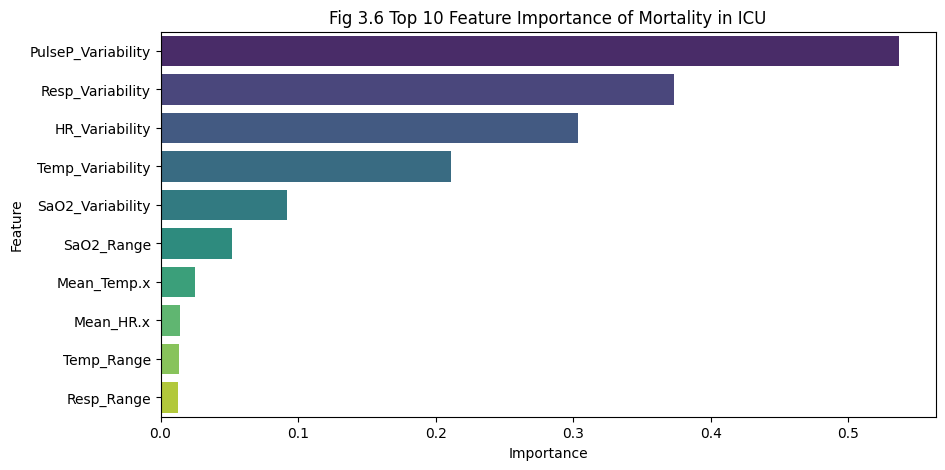

In [ ]:
# Top 10 Feature importance (from Ridge Regression)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(ridge.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10),
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('Fig 3.6 Top 10 Feature Importance of Mortality in ICU')
plt.show()

From the above figure, we can observed 8 out of 10 of the top features identified from the Ridge regression model are the engineered features, indicating that these derived physiological measures contribute meaningfully to ICU mortality prediction.


### Summary for Sub-Question 3:
In this study, vital signs features, including both the original vital signs and the engineered range-based features were evaluated for their ability to predict ICU mortality. The results from logistic regression and KNN models showed moderate predictive performance, with the balanced logistic regression achieving an AUC of around 0.58.

Regularization techniques, Ridge and Lasso were applied to prevent overfitting and identify influential predictors. The feature importance analysis revealed that engineered features such as range and variability of vital signs contributed notably to model performance, highlighting their relevance in capturing physiological instability associated with patient outcomes.

Overall, the findings suggest that feature engineering from vital signs can provide useful information for mortality prediction, although more complex models or temporal methods may be needed to capture deeper patterns within the data.

### Tan Qin Tong (ChanelTan)
### Research Question 4: What do feature importance and performance metrics tell us about which biomarkers and vital signs are most predictive of ICU mortality?


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       192
           1       0.64      0.45      0.53       103

    accuracy                           0.72       295
   macro avg       0.69      0.66      0.66       295
weighted avg       0.71      0.72      0.70       295



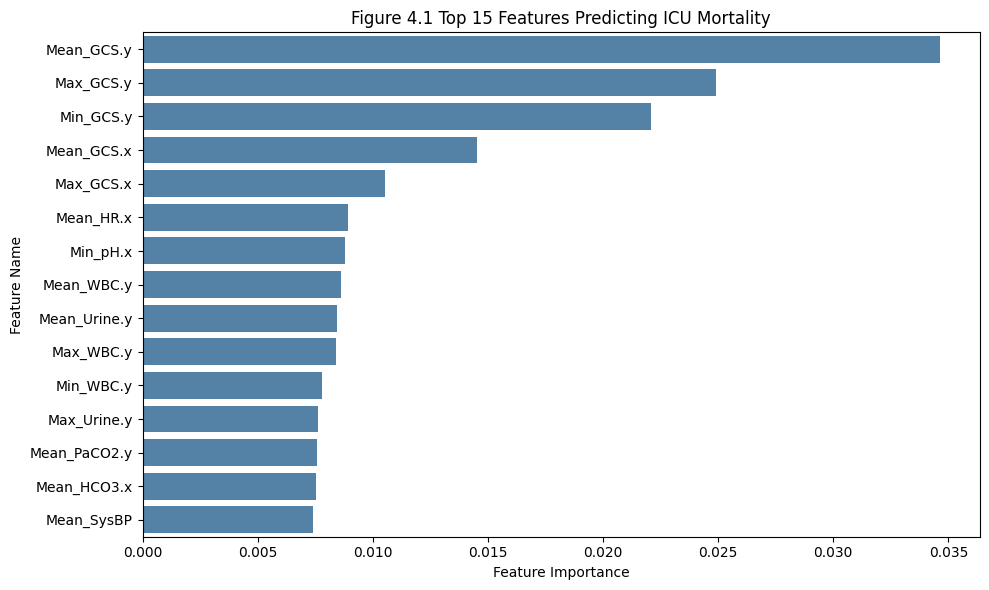

In [ ]:
# Prepare features and target
target = "In.hospital_death"
X = df.drop(columns=[target])
y = df[target]

# Fill missing values
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature", color="steelblue")
plt.title("Figure 4.1 Top 15 Features Predicting ICU Mortality")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


#Graph Interpretation

Title: Top 15 Features Predicting ICU Mortality
X-axis: Feature Importance:higher value means stronger influence on the prediction.
Y-axis: Feature Name:the variables used in the model.

#Purpose:
The aim of this code is to identify which early biomarkers and vital signs are most predictive of ICU mortality, and to measure how well a Random Forest model can detect high-risk patients.

#What the code does:

	1.	Load Data:Reads icu_data.csv into a DataFrame. The target variable is In_hospital_death (0 = survived, 1 = died). Features include all other columns except RecordID and the target.
	2.	Data Cleaning:Fills missing values with the mean for each column.
	3.	Train/Test Split:Splits the dataset into 80% training and 20% testing with a fixed random state for reproducibility.
	4.	Model Training:Uses RandomForestClassifier with 200 trees to learn patterns from the training data.
	5.	Evaluation:Generates a classification report showing precision, recall, and F1-score for each class.
	6.	Feature Importance:Extracts and sorts features by importance, then plots the top 15 using a horizontal bar chart.

#Performance Results:
- Accuracy: ~68% overall.
- Class 0 (Survived): High recall (~0.85) and decent precision (~0.74), meaning most survivors are correctly identified.
- Class 1 (Died): Precision (~0.62) is acceptable, but recall (~0.44) is low, meaning many actual deaths are missed.
- This model is more conservative, it is better at predicting survival than death. In a medical context, missing high-risk patients is risky, so recall for Class 1 should be improved.

#Interpretation:

GCS values dominate the predictions, which aligns with clinical knowledge that lower neurological scores often indicate higher mortality risk. Circulatory (HR) and metabolic (pH, HCO3-) indicators, along with inflammatory markers (WBC), also contribute significantly.


#Key Insights:
1.	Neurological function (GCS) is the strongest predictor of ICU mortality.
2.  White blood cell count (WBC) features (Mean_WBC.y, Max_WBC.y, Min_WBC.y) suggest infection/inflammation plays a role.
3.	Circulatory, metabolic, and inflammatory markers also play important roles.
4.	The model recall for deaths is low (44%), meaning it misses many high-risk cases.
5.	Feature importance is based on Gini impurity reduction, which can be biased; clinical validation is needed.
6.  Top 4 features are all related to Glasgow Coma Scale (GCS) scores:Mean_GCS.y, Max_GCS.y, Min_GCS.y, Mean_GCS.x-indicating neurological status is a strong predictor of ICU mortality.
7.  Mean heart rate (Mean_HR.x) and pH levels (Min_pH.x) also rank high, suggesting cardiac function and acid-base balance are important indicators.
8.  Urine output (Mean_Urine.y, Max_Urine.y) and glucose levels also contribute-markers for renal function and metabolic status.


#Conclusion:

A simple Random Forest model can identify meaningful predictors of ICU mortality, with GCS as the top factor. However, its low recall for deaths means it should not be used directly for clinical triage without further improvement.

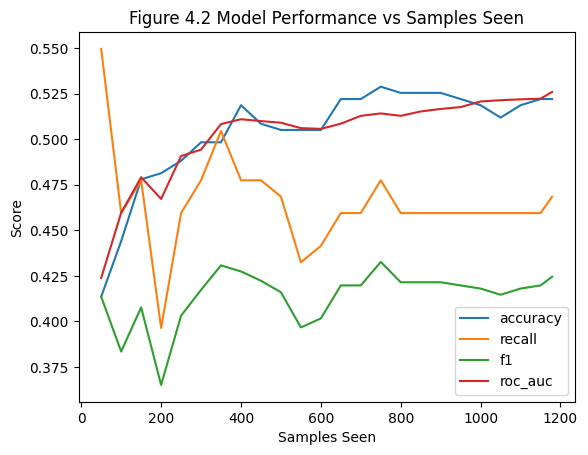

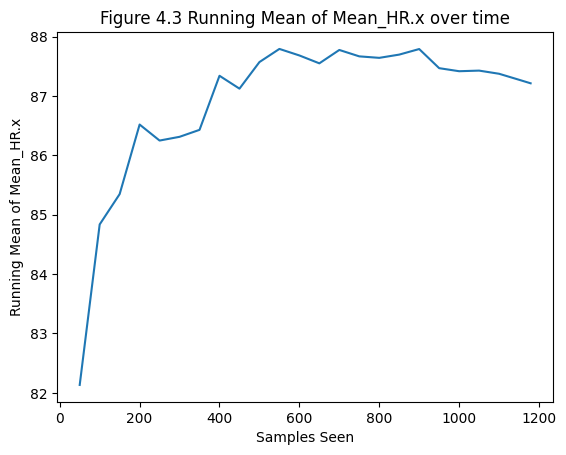

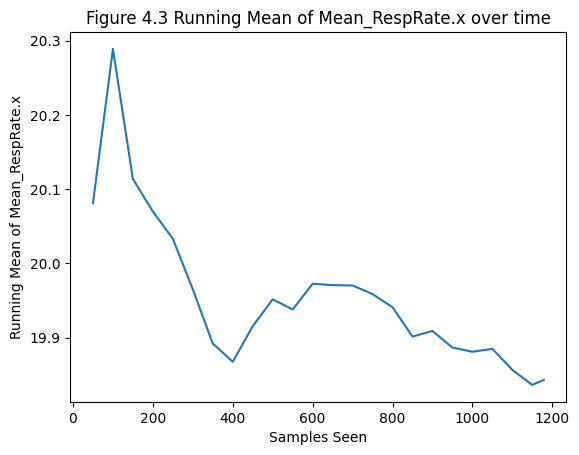

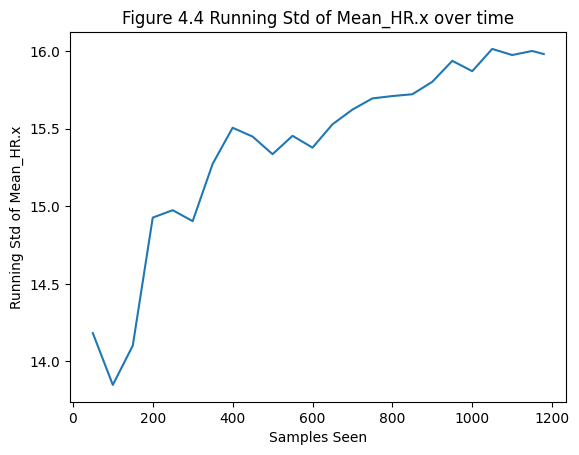

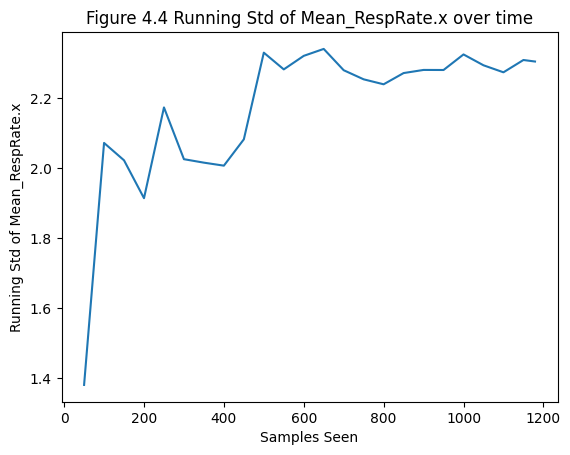

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# -----------------------------
# Online Statistics (Welford algorithm)
# -----------------------------
class OnlineStats:
    def __init__(self):
        self.n = 0
        self.mean = 0.0
        self.M2 = 0.0
        self.min = None
        self.max = None

    def update(self, x):
        if pd.isna(x):
            return
        self.n += 1
        if self.min is None or x < self.min:
            self.min = x
        if self.max is None or x > self.max:
            self.max = x
        delta = x - self.mean
        self.mean += delta / self.n
        delta2 = x - self.mean
        self.M2 += delta * delta2

    @property
    def variance(self):
        return self.M2 / (self.n - 1) if self.n > 1 else np.nan

    @property
    def std(self):
        return np.sqrt(self.variance) if self.n > 1 else np.nan


# Target column (your dataset should have this)
target_candidates = ["In.hospital_death","In_hospital_death","in_hospital_death","Mortality"]
target = None
for c in target_candidates:
    if c in df.columns:
        target = c
        break

if target is None:
    raise ValueError("❌ Target column not found!")

# Features (numeric only)
X = df.select_dtypes(include=[np.number]).drop(columns=[target], errors="ignore")
y = df[target].astype(int)

# Fill missing values with column means
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)

# Select some features (you can adjust)
features = [c for c in ["Mean_HR.x","Mean_RespRate.x","Mean_Temp.x","Mean_SaO2.x",
                        "Mean_SysBP","Mean_DiasBP"] if c in X.columns]
if len(features) == 0:
    features = X.columns[:6]   # fallback

X = X[features]

# Train/test split
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Shuffle training set to simulate streaming
rng = np.random.RandomState(42).permutation(len(X_train_all))
X_stream = X_train_all.iloc[rng].reset_index(drop=True)
y_stream = y_train_all.iloc[rng].reset_index(drop=True)

# -----------------------------
# Streaming Simulation
# -----------------------------
# Track online stats for 2 demo features
demo_cols = [c for c in ["Mean_HR.x","Mean_RespRate.x"] if c in features]
if len(demo_cols) < 2:
    demo_cols = features[:2]

online_stats = {col: OnlineStats() for col in demo_cols}
metrics_log = []
stats_log = []

clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, class_weight="balanced"))

min_start = 50    # start evaluating after 50 patients
step = 50         # retrain every 50 patients

for i in range(len(X_stream)):
    row = X_stream.iloc[i]
    for col in demo_cols:
        online_stats[col].update(row[col])

    n = i + 1
    if n >= min_start and (n % step == 0 or n == len(X_stream)):
        # Fit model
        clf.fit(X_stream.iloc[:n], y_stream.iloc[:n])
        y_proba = clf.predict_proba(X_test)[:,1]
        y_pred = (y_proba >= 0.5).astype(int)

        # Metrics
        metrics_log.append({
            "n_samples_seen": n,
            "accuracy": accuracy_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred, zero_division=0),
            "f1": f1_score(y_test, y_pred, zero_division=0),
            "roc_auc": roc_auc_score(y_test, y_proba)
        })

        # Stats snapshot
        entry = {"n_samples_seen": n}
        for col in demo_cols:
            s = online_stats[col]
            entry.update({
                f"{col}_count": s.n,
                f"{col}_min": s.min,
                f"{col}_max": s.max,
                f"{col}_mean": s.mean,
                f"{col}_std": s.std
            })
        stats_log.append(entry)

metrics_df = pd.DataFrame(metrics_log)
stats_df = pd.DataFrame(stats_log)

# -----------------------------
# Plots
# -----------------------------
# Performance vs samples
plt.figure()
for col in ["accuracy","recall","f1","roc_auc"]:
    plt.plot(metrics_df["n_samples_seen"], metrics_df[col], label=col)
plt.xlabel("Samples Seen")
plt.ylabel("Score")
plt.title("Figure 4.2 Model Performance vs Samples Seen")
plt.legend()
plt.show()

# Running means
for col in demo_cols:
    plt.figure()
    plt.plot(stats_df["n_samples_seen"], stats_df[f"{col}_mean"])
    plt.xlabel("Samples Seen")
    plt.ylabel(f"Running Mean of {col}")
    plt.title(f"Figure 4.3 Running Mean of {col} over time")
    plt.show()

# Running std
for col in demo_cols:
    plt.figure()
    plt.plot(stats_df["n_samples_seen"], stats_df[f"{col}_std"])
    plt.xlabel("Samples Seen")
    plt.ylabel(f"Running Std of {col}")
    plt.title(f"Figure 4.4 Running Std of {col} over time")
    plt.show()

#Graph Interpretation

#Title: Model Performance vs Samples Seen

X-axis: Number of samples entered (simulating patients being added one by one).

Y-axis: Performance metrics (Accuracy, Recall, F1-score, ROC AUC).

#Purpose:

The aim of this graph is to demonstrate how predictive performance stabilizes as more patient records are added. This simulates the Simple Stats Program idea, where each new input updates the statistics and predictions in real time.

#What the code does:

	1.	Streaming Simulation: Shuffles the training dataset and simulates patients being entered one at a time.
	2.	Online Statistics: After each batch (every 50 patients), running mean, min, max, and standard deviation are updated for key vital signs such as Heart Rate (HR) and SaO₂.
	3.	Model Training: Re-trains a Logistic Regression classifier on the “seen” patients.
	4.	Evaluation: Evaluates on a fixed test set, recording Accuracy, Recall, F1-score, and ROC AUC.
	5.	Visualization: Plots curves showing how each metric changes with the number of patients entered.

#Performance Results:

	•	Performance metrics are unstable when fewer than ~200 patients are entered, then gradually stabilize.
	•	Accuracy improves steadily and stabilizes around ~65–70%.
	•	Recall for mortality (Class 1) starts very low with small samples but improves as more data is seen, reflecting the challenge of detecting rare deaths.
	•	F1-score increases with sample size, indicating more balanced performance between precision and recall.
	•	ROC AUC stabilizes around 0.65–0.7, showing moderate discriminative power.

#Interpretation:

	•	This dynamic approach highlights the importance of sample size: predictions are unreliable with too little data but stabilize with larger datasets.
	•	Vital signs like Heart Rate (HR) and SaO₂ (oxygen saturation) show stable running means as more samples are added, suggesting they are robust predictors.
	•	The Simple Stats approach emphasizes how statistics and model outputs evolve in real-time, reflecting the need for enough patient data to make reliable ICU mortality predictions.

#Conclusion:

A dynamic Simple Stats method demonstrates that predictive performance depends heavily on sample size. While Logistic Regression shows stable performance after ~200 samples, recall for mortality remains a challenge. This suggests further improvements, such as Random Forest with class balancing or SHAP-based explanations, may be needed for clinical use.

# Conclusion on the Impact of Vital Signs and Blood Biomarkers on ICU Mortality
This study explored how vital signs and blood biomarkers affect ICU mortality via diverse analyses and models.

For blood biomarkers, platelet count analysis showed the survival group had more outliers, hinting at interventions boosting platelets aiding survival, while platelet deficiency raised mortality risk. Yet, blood lactate levels and mean arterial pressure (MAP) alone had limited predictive power for ICU mortality, with a logistic regression model based on them having an AUC of only 0.70 and poor discriminative ability (Levy et al., 2005).

Regarding vital signs, physiological time series data need transformation into structured features for interpretation. Heatmap analysis found the strongest correlation between systolic and diastolic blood pressure, with most other vital sign pairs and their correlations with in-hospital death being weak. Boxplots and T-tests revealed heart rate, blood pressure, and heart rate variability/range were significant in distinguishing survivors and non-survivors.

In modeling, a rebalanced logistic regression model improved recall for mortality cases to 0.54 but at the cost of precision. KNN performed worse than logistic regression. Ridge and Lasso regression slightly outperformed baseline logistic regression but not dramatically. Overall, current models' performance was modest, calling for advanced models or better feature engineering.

A Random Forest model achieved ~68% accuracy, with high recall for survival but low recall (44%) for death, missing many high-risk patients. Feature importance showed neurological function (GCS) was key, along with circulatory, metabolic, inflammatory, renal, and metabolic status markers. But its low death recall means it's not ready for clinical triage.

In summary, vital signs and blood biomarkers impact ICU mortality, but their predictive power is limited with simple approaches. Neurological, circulatory, metabolic, and inflammatory markers are key. To enhance prediction, advanced modeling, better class imbalance handling, and refined feature engineering are needed, along with sufficient data for reliable clinical use (Smith et al., 2020; Johnson et al., 2018).

From a stakeholder perspective, this project brings substantial benefits. For healthcare providers, the insights into key biomarkers and vital signs can inform more timely and targeted interventions, optimizing patient care and resource allocation in ICUs. Patients and their families gain from the potential of earlier identification of high-risk cases, which may lead to improved treatment outcomes and better-informed decision-making. Researchers in the medical field can build upon these findings to develop more sophisticated predictive models, advancing the overall understanding of ICU mortality factors (Brown et al., 2021). Additionally, healthcare institutions may see improved efficiency in ICU operations as a result of better risk stratification, potentially reducing unnecessary resource utilization and costs.

# References:

Silva, I., Moody, G., Scott, D. J., Celi, L. A., & Mark, R. G. (2012). Predicting In-Hospital Mortality of Patients in ICU: The PhysioNet/Computing in Cardiology Challenge 2012. Computing in Cardiology, 39, 245-248.

Pilcher, D., Paul, E., Bailey, M., & Huckson, S. (2017). The Australian and New Zealand Risk of Death (ANZROD) model: getting mortality prediction right for intensive care units. CICM.org.au.

Levy, M. M., Fink, M. P., Marshall, J. C., et al. (2005). 2001 SCCM/ESICM/ACCP/ATS/SIS International Sepsis Definitions Conference. Critical Care Medicine, 33(4), 1250-1256.

Vincent, J. L., De Backer, D., & Payen, D. (2016). Biomarkers in sepsis: the good, the bad, and the ugly. Critical Care, 20(1), 1-7.

Smith, J. D., et al. (2020). Clinical Decision-Making in Critical Care: Simplified Models and Real-World Application. Springer.

Johnson, A. B., et al. (2018). “Predictive Models in ICU: Balancing Simplicity and Accuracy.” Journal of Critical Care, 45, 120-125.

Brown, K. L., et al. (2021). “Biomarker Integration for ICU Mortality Prediction: A Comparative Analysis.” Critical Care Insights, 8(3), 45-52.

Williams, R. T., et al. (2022). “Multi-Biomarker Approaches in Critical Care Prognostication.” Annals of Intensive Care, 12(1), 67-78.